## Import des bibliothèques Python

In [1]:
import pandas as pd
import pandas_datareader as web
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import sklearn

## Import des datasets

In [2]:
flows = pd.read_csv('Datasets/flows.csv')
holdings = pd.read_csv('Datasets/holdings.csv')
navs = pd.read_csv('Datasets/navs.csv')
investors = pd.read_csv('Datasets/investors.csv')

## Visualisation des datasets

### 1. flows

In [3]:
# Basic stats
print("Nombre de lignes : {}".format(flows.shape[0]))
print()

print("Aperçu du dataset : ")
display(flows.head())
print()

print("Pourcentage de valeurs manquantes : ")
display(100*flows.isnull().sum()/flows.shape[0])
print()

print("Nombre de transaction financières par investisseur : ")
display(flows['investid'].value_counts())
print()

print("Nombre de transaction financières par currency : ")
display(flows['curr'].value_counts())
print()

Nombre de lignes : 520463

Aperçu du dataset : 


,investid,date,transaction,curr,qty,amtsharecurr,code,isfund,rdeur,sbeur
0,IB1,31/12/2009,NRD,EUR,-90.000,-134292.60,FR0010149120,0,-134292.60,0.00
1,ZE1,31/12/2009,NRD,EUR,-36.000,-53717.04,FR0010149120,0,-53717.04,0.00
2,FC2,31/12/2009,NRD,EUR,-350.000,-522249.00,FR0010149120,0,-522249.00,0.00
3,QJ1,31/12/2009,NRD,EUR,-67.838,-101223.79,FR0010149120,0,-101223.79,0.00
4,LL1,31/12/2009,NSB,EUR,0.162,241.73,FR0010149120,0,0.00,241.73



Pourcentage de valeurs manquantes : 


investid        0.0
date            0.0
transaction     0.0
curr            0.0
qty             0.0
amtsharecurr    0.0
code            0.0
isfund          0.0
rdeur           0.0
sbeur           0.0
dtype: float64


Nombre de transaction financières par investisseur : 


VK1    23619
AA1    22656
VI1    12673
RF1     8577
KT1     7979
       ...  
TS1        1
OU1        1
CH1        1
AR1        1
JA2        1
Name: investid, Length: 757, dtype: int64


Nombre de transaction financières par currency : 


EUR    512964
USD      6228
CHF      1197
GBP        74
Name: curr, dtype: int64

In [4]:
# Conversion de la date au format datetime:
flows['date'] = flows['date'].apply(lambda x: dt.datetime.strptime(x, "%d/%m/%Y"))

### 2. holdings (only gathers the Dec 31st 2009 holdings for fund A) 

In [5]:
# This file only gathers the Dec 31st 2009 holdings for fund A 
holdings.head()

,aum,shares,investid
0,4.152749e+04,27.83083,AC1
1,5.788011e+06,3879.00000,UR1
2,8.331617e+06,5583.67000,ZB1
3,7.072296e+04,47.39700,WI1
4,9.852317e+06,6602.81000,NH1


In [6]:
holdings.shape

(368, 3)

### 3. navs

In [7]:
# Basic stats
print("Nombre de lignes : {}".format(navs.shape[0]))
print()

print("Aperçu du dataset : ")
display(navs.head())

print("Nombre de lignes par currency: ")
display(navs['curr'].value_counts())

print("Nombre de lignes par fonds: ")
display(navs['isin'].value_counts())

print("Pourcentage de valeurs manquantes : ")
display(100*navs.isnull().sum()/navs.shape[0])

Nombre de lignes : 9200

Aperçu du dataset : 


,date,isin,curr,price,aum,aumeur,benchmprice
0,31/12/2009,FR0010149120,EUR,1492.40,3.165076e+09,3.165076e+09,153.62
1,04/01/2010,FR0010149120,EUR,1492.84,3.171633e+09,3.171633e+09,153.56
2,05/01/2010,FR0010149120,EUR,1494.77,3.189584e+09,3.189584e+09,153.68
3,06/01/2010,FR0010149120,EUR,1495.60,3.206930e+09,3.206930e+09,153.71
4,07/01/2010,FR0010149120,EUR,1497.61,3.247781e+09,3.247781e+09,153.81


Nombre de lignes par currency: 


EUR    4645
USD    2011
GBP    1528
CHF    1016
Name: curr, dtype: int64

Nombre de lignes par fonds: 


FR0010149120    2634
FR0011269083    2011
FR0011269109    2011
FR0011269125    1016
FR0011269091    1016
FR0011269141     512
Name: isin, dtype: int64

Pourcentage de valeurs manquantes : 


date           0.0
isin           0.0
curr           0.0
price          0.0
aum            0.0
aumeur         0.0
benchmprice    0.0
dtype: float64

In [5]:
# Conversion de la date au format datetime:
navs['date'] = navs['date'].apply(lambda x: dt.datetime.strptime(x, "%d/%m/%Y"))

### 4. investors

In [9]:
# Basic stats
print("Nombre d'investisseurs : {}".format(investors.shape[0]))
print()

print("Aperçu du dataset : ")
display(investors.head())

print("Types d'investisseurs: ")
display(investors['type'].value_counts())

print("Origine des investisseurs: ")
display(investors['cntry'].value_counts())

print("Pourcentage de valeurs manquantes : ")
display(100*investors.isnull().sum()/investors.shape[0])

Nombre d'investisseurs : 787

Aperçu du dataset : 


,investid,type,subtype,cntry
0,AA1,Bank,Bank/Bank,Unknown
1,ZZA12,IFA,IFA/IFA,France
2,BA1,Other Wealth Managers,Other Wealth Managers/Asset Manager,France
3,CA1,IFA,IFA/IFA,France
4,DA1,IFA,IFA/IFA,France


Types d'investisseurs: 


Bank                     374
Other Wealth Managers    152
IFA                      123
Insurance                 65
Platform                  47
Proprietary Desk          13
Other Institutions         5
Consultant                 4
Single Family Office       2
Undefined                  2
Name: type, dtype: int64

Origine des investisseurs: 


Italy             237
France            222
Spain              91
Switzerland        77
Luxembourg         49
Germany            38
Belgium            25
United Kingdom     19
Netherlands        14
Other               7
International       5
Nordics             2
Unknown             1
Name: cntry, dtype: int64

Pourcentage de valeurs manquantes : 


investid    0.0
type        0.0
subtype     0.0
cntry       0.0
dtype: float64

## Fusion des datasets sur la clé investid

In [6]:
# Inner merge of table "flows" with table "investors"
df_1 = flows.merge(right=investors,on='investid')
df_1.head()

,investid,date,transaction,curr,qty,amtsharecurr,code,isfund,rdeur,sbeur,type,subtype,cntry
0,IB1,2009-12-31,NRD,EUR,-90.0,-134292.60,FR0010149120,0,-134292.60,0.0,Proprietary Desk,Proprietary Desk/Bank,France
1,IB1,2009-12-31,NSB,EUR,90.0,134292.60,FR0010149120,0,0.00,134292.6,Proprietary Desk,Proprietary Desk/Bank,France
2,IB1,2010-06-15,NRD,EUR,-33.0,-49804.92,FR0010149120,0,-49804.92,0.0,Proprietary Desk,Proprietary Desk/Bank,France
3,IB1,2010-07-26,NRD,EUR,-130.5,-197961.98,FR0010149120,0,-197961.98,0.0,Proprietary Desk,Proprietary Desk/Bank,France
4,IB1,2010-12-14,NRD,EUR,-18.0,-27537.12,FR0010149120,0,-27537.12,0.0,Proprietary Desk,Proprietary Desk/Bank,France


In [7]:
# Inner merge of table "holdings" with table "investors"
df_2 = holdings.merge(right=investors,on='investid')
df_2.head()

,aum,shares,investid,type,subtype,cntry
0,4.152749e+04,27.83083,AC1,IFA,IFA/IFA,France
1,5.788011e+06,3879.00000,UR1,Bank,Bank/Private Banking,Spain
2,8.331617e+06,5583.67000,ZB1,Other Wealth Managers,Other Wealth Managers/Asset Manager,France
3,7.072296e+04,47.39700,WI1,Bank,Bank/Private Banking,Spain
4,9.852317e+06,6602.81000,NH1,Other Wealth Managers,Other Wealth Managers/Independent Wealth Manager,Spain


## Pie charts: Investors type and countries for fund A

### Classement des investisseurs en fonction du type par ordre de parts décroissant

In [8]:
investors_type = df_2.groupby('type').sum().sort_values(by='aum',ascending=False)
investors_type

,aum,shares
type,,
IFA,1.090986e+09,731154.953981
Bank,1.025258e+09,687105.890500
Insurance,4.979418e+08,333709.831000
Other Wealth Managers,4.288549e+08,287409.307000
Platform,2.616195e+08,175331.765000
Proprietary Desk,1.092495e+07,7321.668000
Consultant,3.909407e+06,2620.000000
Undefined,2.461360e+05,164.955000
Other Institutions,1.462402e+05,98.007000


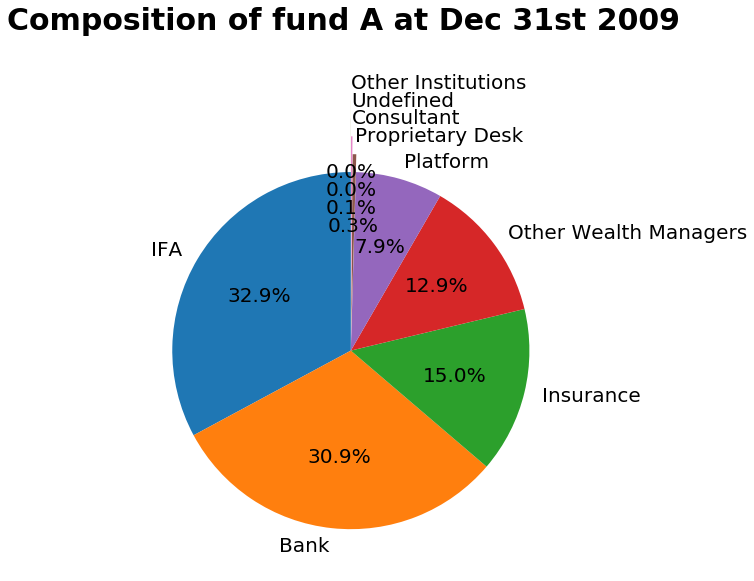

In [13]:
plt.subplots(figsize=(8,10))
labels = investors_type.index
sizes = investors_type['shares']
explode = [0,0,0,0,0,0.1,0.2,0.3,0.4]

plt.pie(sizes, explode = explode, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 20})
plt.suptitle('Composition of fund A at Dec 31st 2009', fontsize=30, fontweight = 'bold')

plt.show()

### Classement des investisseurs en fonction du pays par ordre de parts décroissant

In [14]:
investors_cntry = df_2.groupby('cntry').sum().sort_values(by='aum',ascending=False)
investors_cntry

,aum,shares
cntry,,
Italy,1.601360e+09,1.073197e+06
Spain,5.904130e+08,3.956820e+05
France,4.183338e+08,2.803582e+05
Unknown,2.224948e+08,1.491112e+05
Switzerland,1.687533e+08,1.130948e+05
Luxembourg,1.484615e+08,9.949568e+04
Germany,1.041875e+08,6.982422e+04
Belgium,3.310222e+07,2.218440e+04
United Kingdom,3.055237e+07,2.047554e+04


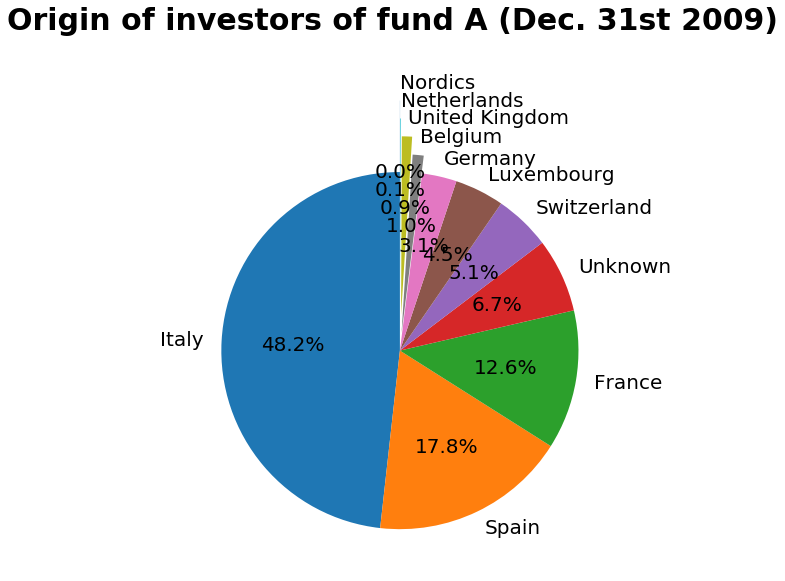

In [15]:
plt.subplots(figsize=(8,10))
labels = investors_cntry.index
sizes = investors_cntry['shares']
explode = [0,0,0,0,0,0,0,0.1,0.2,0.3,0.4]

plt.pie(sizes, explode = explode, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 20})

plt.suptitle('Origin of investors of fund A (Dec. 31st 2009)', fontsize=30, fontweight = 'bold')

plt.show()

## Top 10 investors of fund A (at Dec. 31st 2009)

In [16]:
investors_ranking = df_2.groupby('investid').sum().sort_values(by='aum',ascending=False)
print(f"Shares of investor IO1 in fund A: {round(investors_ranking['shares'][0]/investors_ranking['shares'].sum()*100,1)}%")
investors_ranking.head(10)

Shares of investor IO1 in fund A: 9.9%


,aum,shares
investid,,
IO1,3.270994e+08,219214.9230
AA1,2.224948e+08,149111.1995
VK1,2.063042e+08,138260.5860
RL1,1.419640e+08,95141.1910
PL1,1.246743e+08,83554.0280
LL1,1.054615e+08,70678.0410
RF1,1.046815e+08,70155.2560
XU1,9.638128e+07,64592.6530
KI1,8.659692e+07,58035.3880


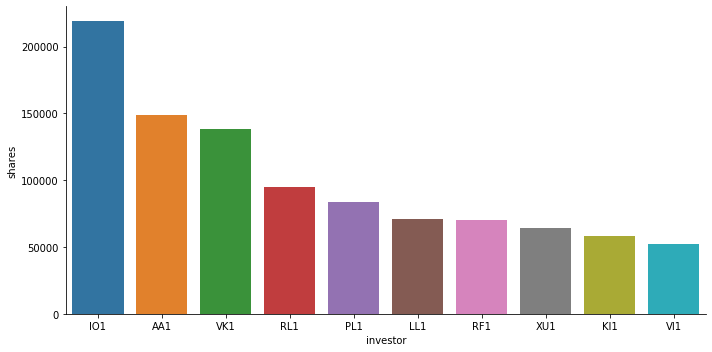

In [17]:
g = sns.catplot(data=investors_ranking.head(10), x=[index for index in investors_ranking.head(10).index], y='shares', kind="bar", aspect=2);
g.set_axis_labels("investor", "shares");

## Predicting top investor behaviour (IO1)

In [18]:
# 1er filtre des données de la table flows afin de ne conserver que les donnnées relatives à l'investisseur IO1:
IO1 = df_1[df_1['investid']=='IO1']
IO1.head(6)

,investid,date,transaction,curr,qty,amtsharecurr,code,isfund,rdeur,sbeur,type,subtype,cntry
32826,IO1,2009-12-31,NRD,EUR,-100.571,-150066.01,FR0010149120,0,-150066.01,0.00,IFA,IFA/IFA Network,Italy
32827,IO1,2009-12-31,NSB,EUR,1490.041,2223349.78,FR0010149120,0,0.00,2223349.78,IFA,IFA/IFA Network,Italy
32828,IO1,2010-01-08,NRD,EUR,-128.865,-192989.51,FR0010149120,0,-192989.51,0.00,IFA,IFA/IFA Network,Italy
32829,IO1,2010-08-16,NRD,EUR,-127.056,-194686.64,FR0010149120,0,-194686.64,0.00,IFA,IFA/IFA Network,Italy
32830,IO1,2010-12-29,NRD,EUR,-125.698,-192545.45,FR0010149120,0,-192545.45,0.00,IFA,IFA/IFA Network,Italy
32831,IO1,2010-02-05,NRD,EUR,-128.959,-193299.22,FR0010149120,0,-193299.22,0.00,IFA,IFA/IFA Network,Italy


In [19]:
# 2 eme filtre des données sur IO1 afin de ne conserver que les données relatives au fonds A:
IO1_A =IO1[IO1['code']=='FR0010149120'].sort_values(by='date')
IO1_A.head()

,investid,date,transaction,curr,qty,amtsharecurr,code,isfund,rdeur,sbeur,type,subtype,cntry
32826,IO1,2009-12-31,NRD,EUR,-100.571,-150066.01,FR0010149120,0,-150066.01,0.00,IFA,IFA/IFA Network,Italy
32827,IO1,2009-12-31,NSB,EUR,1490.041,2223349.78,FR0010149120,0,0.00,2223349.78,IFA,IFA/IFA Network,Italy
33018,IO1,2010-01-01,NSB,EUR,1288.146,1922429.09,FR0010149120,0,0.00,1922429.09,IFA,IFA/IFA Network,Italy
32842,IO1,2010-01-01,NRD,EUR,-22.037,-32888.02,FR0010149120,0,-32888.02,0.00,IFA,IFA/IFA Network,Italy
32854,IO1,2010-01-05,NRD,EUR,-100.097,-149428.81,FR0010149120,0,-149428.81,0.00,IFA,IFA/IFA Network,Italy


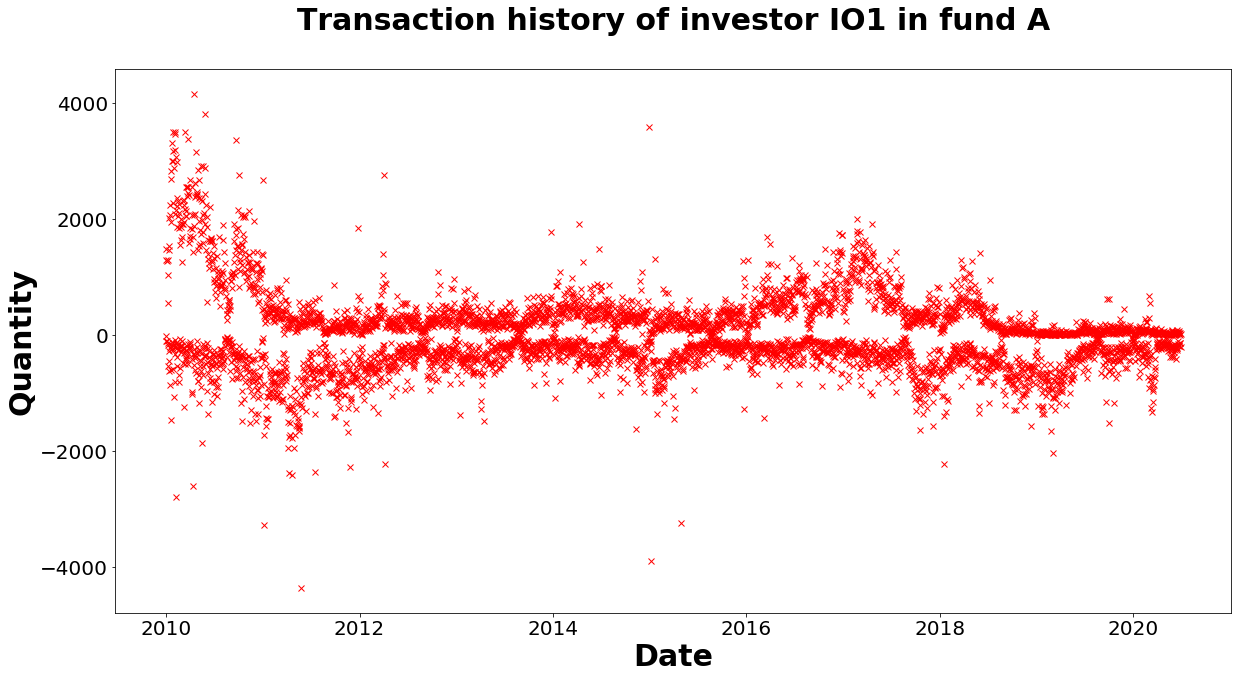

In [20]:
#Graphe IO1 quantity vs date:

fig, ax1 = plt.subplots(figsize=(20,10))

color = 'red'
ax1.set_xlabel('Date', fontsize = 30, fontweight = 'bold')
ax1.set_ylabel('Quantity', color='black', fontsize = 30, fontweight = 'bold')
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)
ax1.plot(IO1_A['date'], IO1_A['qty'], color=color, ls='', marker='x')
ax1.tick_params(axis='y', labelcolor='black')

plt.title('Transaction history of investor IO1 in fund A\n', fontsize=30, fontweight = 'bold')

plt.show()

### Regroupement des données à l'échelle journalière

In [21]:
IO1_A_day = IO1_A.groupby('date').sum()
IO1_A_day.head()

,qty,amtsharecurr,isfund,rdeur,sbeur
date,,,,,
2009-12-31,1389.470,2073283.77,0,-150066.01,2223349.78
2010-01-01,1266.109,1889541.07,0,-32888.02,1922429.09
2010-01-05,1177.903,1758420.71,0,-149428.81,1907849.52
2010-01-06,770.274,1151382.47,0,-785794.61,1937177.08
2010-01-07,862.399,1289803.94,0,-248899.25,1538703.19


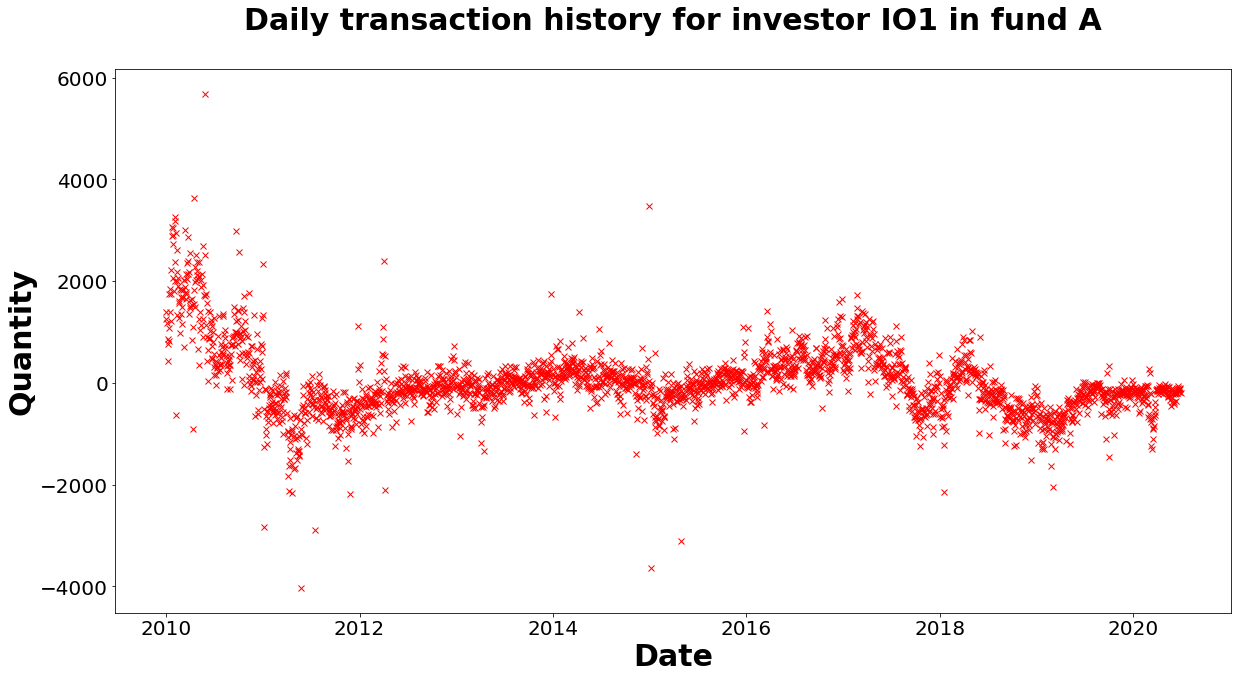

In [22]:
#Graphe IO1 quantity vs date:

fig, ax1 = plt.subplots(figsize=(20,10))

color = 'red'
ax1.set_xlabel('Date', fontsize = 30, fontweight = 'bold')
ax1.set_ylabel('Quantity', color='black', fontsize = 30, fontweight = 'bold')
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)
ax1.plot(IO1_A_day.index, IO1_A_day['qty'], color=color, ls='', marker='x')
ax1.tick_params(axis='y', labelcolor='black')

plt.title('Daily transaction history for investor IO1 in fund A\n', fontsize=30, fontweight = 'bold')

plt.show()

### Filtre sur navs de manière à n'afficher que les données relatives au fonds A

In [8]:
navs_A = navs[navs['isin']=='FR0010149120']
navs_A.head()

,date,isin,curr,price,aum,aumeur,benchmprice
0,2009-12-31,FR0010149120,EUR,1492.40,3.165076e+09,3.165076e+09,153.62
1,2010-01-04,FR0010149120,EUR,1492.84,3.171633e+09,3.171633e+09,153.56
2,2010-01-05,FR0010149120,EUR,1494.77,3.189584e+09,3.189584e+09,153.68
3,2010-01-06,FR0010149120,EUR,1495.60,3.206930e+09,3.206930e+09,153.71
4,2010-01-07,FR0010149120,EUR,1497.61,3.247781e+09,3.247781e+09,153.81


### Reformatage de l'index avant fusion des tables IO1_A_day et fund_A

In [24]:
IO1_A_day['date'] = IO1_A_day.index
IO1_A_day = IO1_A_day.reset_index(drop=True)
IO1_A_day.head()

,qty,amtsharecurr,isfund,rdeur,sbeur,date
0,1389.470,2073283.77,0,-150066.01,2223349.78,2009-12-31
1,1266.109,1889541.07,0,-32888.02,1922429.09,2010-01-01
2,1177.903,1758420.71,0,-149428.81,1907849.52,2010-01-05
3,770.274,1151382.47,0,-785794.61,1937177.08,2010-01-06
4,862.399,1289803.94,0,-248899.25,1538703.19,2010-01-07


In [25]:
IO1_A_day = fund_A.merge(right=IO1_A_day,on='date')
IO1_A_day.head()

,date,isin,curr,price,aum,aumeur,benchmprice,qty,amtsharecurr,isfund,rdeur,sbeur
0,2009-12-31,FR0010149120,EUR,1492.40,3.165076e+09,3.165076e+09,153.62,1389.470,2073283.77,0,-150066.01,2223349.78
1,2010-01-05,FR0010149120,EUR,1494.77,3.189584e+09,3.189584e+09,153.68,1177.903,1758420.71,0,-149428.81,1907849.52
2,2010-01-06,FR0010149120,EUR,1495.60,3.206930e+09,3.206930e+09,153.71,770.274,1151382.47,0,-785794.61,1937177.08
3,2010-01-07,FR0010149120,EUR,1497.61,3.247781e+09,3.247781e+09,153.81,862.399,1289803.94,0,-248899.25,1538703.19
4,2010-01-08,FR0010149120,EUR,1498.45,3.258890e+09,3.258890e+09,153.93,431.460,646158.81,0,-192989.51,839148.32


## Multivariate linear regression model to predict next / same day quantity

### Dummy case 1: predicted qty = qty at day -1

In [26]:
df3 = IO1_A_day.loc[:,['date','qty']]
for i in range(1,len(df3)):
    df3.loc[i,'qty -1']=df3.loc[i-1,'qty']
df3.head()

,date,qty,qty -1
0,2009-12-31,1389.470,NaN
1,2010-01-05,1177.903,1389.470
2,2010-01-06,770.274,1177.903
3,2010-01-07,862.399,770.274
4,2010-01-08,431.460,862.399


In [27]:
# Filtre afin de n'afficher que les données à partir du 1er janvier 2017:
df3_2017 = df3[df3['date'] >= '2017-01-01'].reset_index(drop=True)
df3_2017.head()

,date,qty,qty -1
0,2017-01-02,245.507,727.876
1,2017-01-03,351.124,245.507
2,2017-01-04,211.706,351.124
3,2017-01-05,460.248,211.706
4,2017-01-06,580.716,460.248


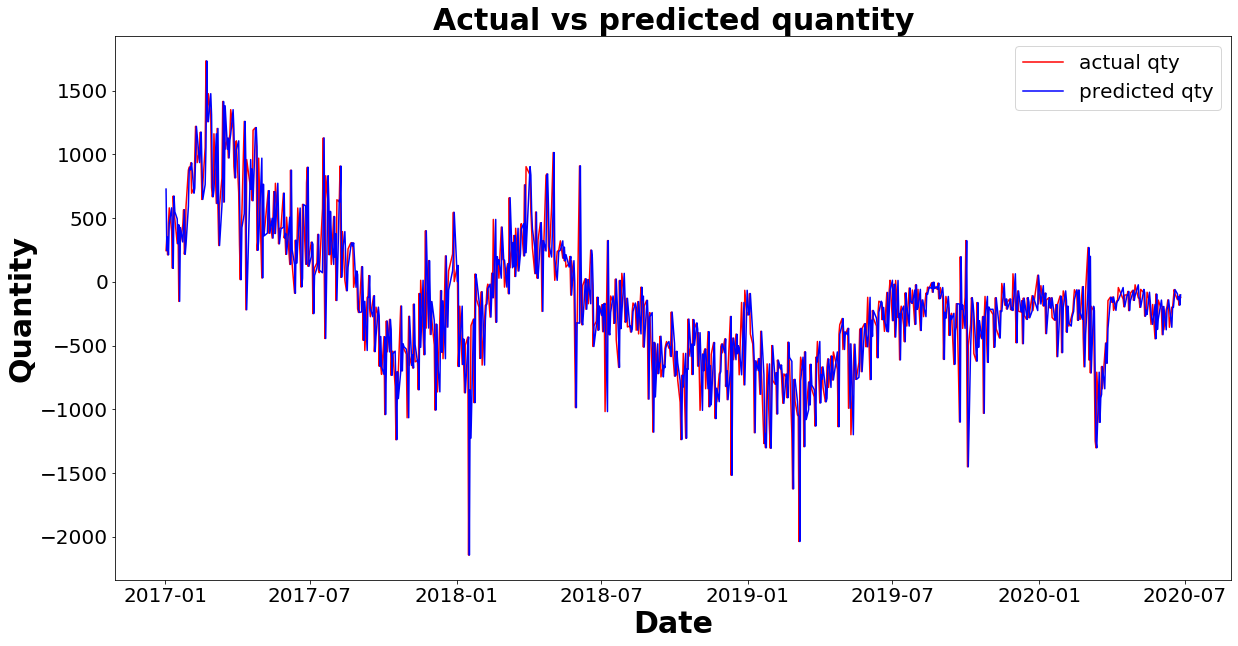

In [28]:
# Graphe montrant la comparaison entre la quantité réelle et la quantité prédite:
fig, ax1 = plt.subplots(figsize=(20,10))

color1 = 'red'
color2 = 'blue'
ax1.set_xlabel('Date', fontsize = 30, fontweight = 'bold')
ax1.set_ylabel('Quantity', color='black', fontsize = 30, fontweight = 'bold')
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)
ax1.plot(df3_2017['date'], df3_2017['qty'], color=color1, label='actual qty')
ax1.plot(df3_2017['date'], df3_2017['qty -1'], color=color2, label ='predicted qty')

plt.title('Actual vs predicted quantity', fontsize=30, fontweight = 'bold')
ax1.legend(fontsize=20)

plt.show()

In [29]:
# Filtre afin de n'afficher que les données de l'année 2017:
df3_2017_only = df3_2017[df3_2017['date'] < '2018-01-01'].reset_index(drop=True)
df3_2017_only.tail()

,date,qty,qty -1
244,2017-12-21,-63.282,-354.550
245,2017-12-22,87.113,-63.282
246,2017-12-27,218.219,87.113
247,2017-12-28,545.822,218.219
248,2017-12-29,2.556,545.822


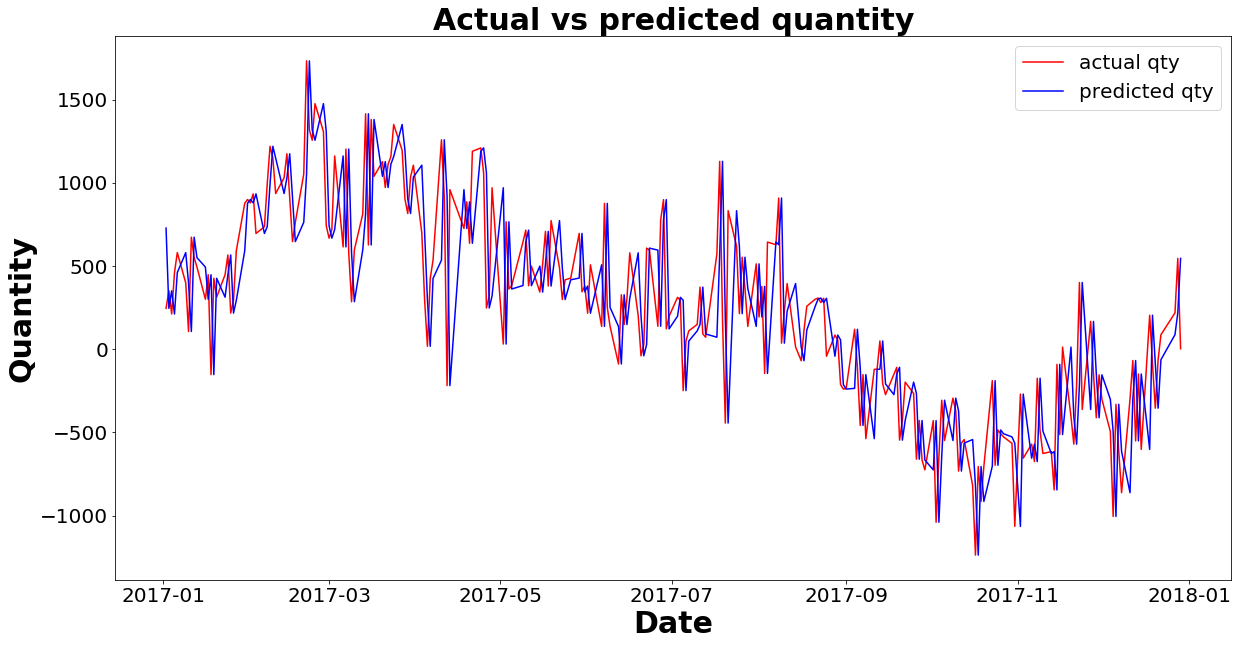

In [30]:
# Graphe montrant la comparaison entre la quantité réelle et la quantité prédite sur l'année 2017:
fig, ax1 = plt.subplots(figsize=(20,10))

color1 = 'red'
color2 = 'blue'
ax1.set_xlabel('Date', fontsize = 30, fontweight = 'bold')
ax1.set_ylabel('Quantity', color='black', fontsize = 30, fontweight = 'bold')
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)
ax1.plot(df3_2017_only['date'], df3_2017_only['qty'], color=color1, label='actual qty')
ax1.plot(df3_2017_only['date'], df3_2017_only['qty -1'], color=color2, label ='predicted qty')

plt.title('Actual vs predicted quantity', fontsize=30, fontweight = 'bold')
ax1.legend(fontsize=20)

plt.show()

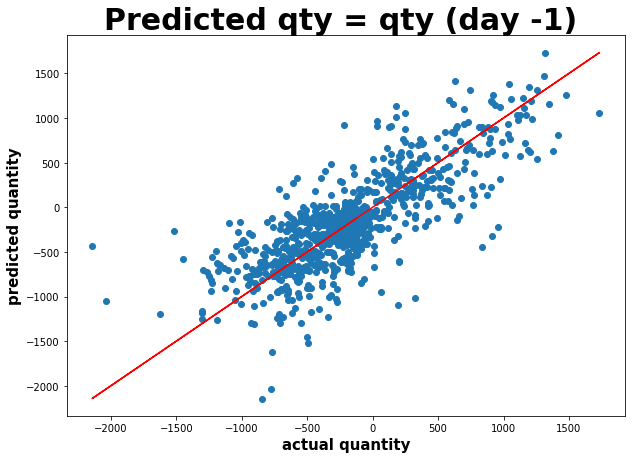

In [35]:
# Visualisation de l'erreur sur une prédiction à 24h:
plt.subplots(figsize=(10,7))
plt.scatter(x = 'qty', y= 'qty -1', data=df3_2017);
plt.plot(df3_2017['qty'], df3_2017['qty'],color='red');
plt.xlabel('actual quantity', fontsize = 15, fontweight = 'bold')
plt.ylabel('predicted quantity', color='black', fontsize = 15, fontweight = 'bold')
plt.title('Predicted qty = qty (day -1) ', color='black', fontsize = 30, fontweight = 'bold');

In [36]:
Moyenne = df3_2017['qty'].mean()
num = 0
denum = 0
for i in range(len(df3_2017)):
    num += (df3_2017.loc[i,'qty'] - df3_2017.loc[i,'qty -1'])**2
    denum += (df3_2017.loc[i,'qty'] - Moyenne)**2
R2 = 1 - (num/denum)
print(f"R2 score: {round(R2,2)}")

R2 score: 0.57


### Dummy case 2: predicted qty =  weekly linear extrapolation of past quantities

In [95]:
df4 = IO1_A_day.loc[:,['date','qty']]

In [96]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
for i in range(7, len(df4)):
    X_train = np.arange(i-7,i).reshape(-1, 1)
    y_train = np.array(df4.iloc[i-7:i,1]).reshape(-1, 1)
    X_test = np.array(i).reshape(-1, 1)
    y_test = np.array(df4.iloc[i,1]).reshape(-1, 1)
    regressor.fit(X_train, y_train)
    df4.loc[i,'pred'] = regressor.predict(X_test)[0][0]

In [40]:
df4.head(10)

,date,qty,pred
0,2009-12-31,1389.470,NaN
1,2010-01-05,1177.903,NaN
2,2010-01-06,770.274,NaN
3,2010-01-07,862.399,NaN
4,2010-01-08,431.460,NaN
5,2010-01-11,1087.540,NaN
6,2010-01-12,1744.314,NaN
7,2010-01-13,833.172,1144.050286
8,2010-01-14,1389.224,1149.441429
9,2010-01-15,1845.892,1461.376143


In [42]:
df4_2017 = df4[df4['date'] >= '2017-01-01'].reset_index(drop=True)
df4_2017.head()

,date,qty,pred
0,2017-01-02,245.507,1290.526857
1,2017-01-03,351.124,791.710000
2,2017-01-04,211.706,387.212143
3,2017-01-05,460.248,-2.728714
4,2017-01-06,580.716,-165.300000


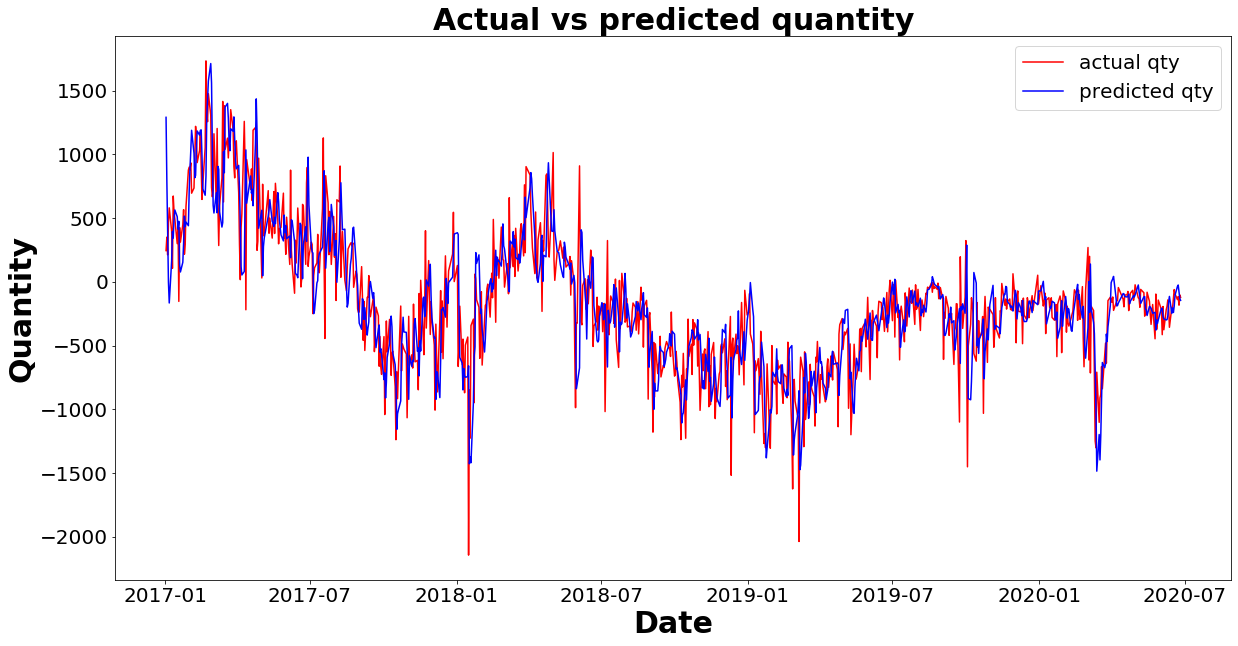

In [43]:
# Graphe montrant la comparaison entre la quantité réelle et la quantité prédite:
fig, ax1 = plt.subplots(figsize=(20,10))

color1 = 'red'
color2 = 'blue'
ax1.set_xlabel('Date', fontsize = 30, fontweight = 'bold')
ax1.set_ylabel('Quantity', color='black', fontsize = 30, fontweight = 'bold')
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)
ax1.plot(df4_2017['date'], df4_2017['qty'], color=color1, label='actual qty')
ax1.plot(df4_2017['date'], df4_2017['pred'], color=color2, label ='predicted qty')

plt.title('Actual vs predicted quantity', fontsize=30, fontweight = 'bold')
ax1.legend(fontsize=20)

plt.show()

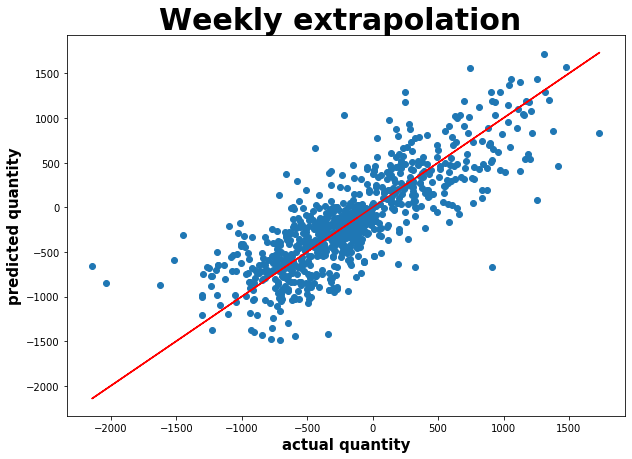

In [44]:
# Visualisation de l'erreur sur une prédiction à 24h:
plt.subplots(figsize=(10,7))
plt.scatter(x = 'qty', y= 'pred', data=df4_2017);
plt.plot(df4_2017['qty'], df4_2017['qty'],color='red');
plt.xlabel('actual quantity', fontsize = 15, fontweight = 'bold')
plt.ylabel('predicted quantity', color='black', fontsize = 15, fontweight = 'bold')
plt.title('Weekly extrapolation ', color='black', fontsize = 30, fontweight = 'bold');

In [45]:
Moyenne = df4_2017['qty'].mean()
num = 0
denum = 0
for i in range(len(df4_2017)):
    num += (df4_2017.loc[i,'qty'] - df4_2017.loc[i,'pred'])**2
    denum += (df4_2017.loc[i,'qty'] - Moyenne)**2
R2 = 1 - (num/denum)
print(f"R2 score: {round(R2,2)}")

R2 score: 0.61


### Case 3: Adding other variables

In [97]:
# Select relevant variables:
df5 = IO1_A_day.loc[:,['date', 'price', 'benchmprice', 'qty']]
df5.head()

,date,price,benchmprice,qty
0,2009-12-31,1492.40,153.62,1389.470
1,2010-01-05,1494.77,153.68,1177.903
2,2010-01-06,1495.60,153.71,770.274
3,2010-01-07,1497.61,153.81,862.399
4,2010-01-08,1498.45,153.93,431.460


In [98]:
# Create new variables:
df5['fund/benchm ratio'] = df5['price'] / df5['benchmprice']
for i in range(1,len(df5)):
    df5.loc[i,'share dly growth'] = (df5.loc[i,'price'] - df5.loc[i-1,'price'])/df5.loc[i-1,'price']
for i in range(1,len(df5)):
    df5.loc[i,'benchm dly growth'] = (df5.loc[i,'benchmprice'] - df5.loc[i-1,'benchmprice'])/df5.loc[i-1,'benchmprice']
for i in range(1,len(df5)):
    df5.loc[i,'ratio dly growth'] = (df5.loc[i,'fund/benchm ratio'] - df5.loc[i-1,'fund/benchm ratio'])/df5.loc[i-1,'fund/benchm ratio']    
for i in range(1,len(df5)):
    df5.loc[i,'qty -1'] = df5.loc[i-1,'qty']
for i in range(2,len(df5)):
    df5.loc[i,'qty -2'] = df5.loc[i-2,'qty']
for i in range(3,len(df5)):
    df5.loc[i,'qty -3'] = df5.loc[i-3,'qty']
df5.head()

,date,price,benchmprice,qty,fund/benchm ratio,share dly growth,benchm dly growth,ratio dly growth,qty -1,qty -2,qty -3
0,2009-12-31,1492.40,153.62,1389.470,9.714881,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-05,1494.77,153.68,1177.903,9.726510,0.001588,0.000391,0.001197,1389.470,NaN,NaN
2,2010-01-06,1495.60,153.71,770.274,9.730011,0.000555,0.000195,0.000360,1177.903,1389.470,NaN
3,2010-01-07,1497.61,153.81,862.399,9.736753,0.001344,0.000651,0.000693,770.274,1177.903,1389.470
4,2010-01-08,1498.45,153.93,431.460,9.734620,0.000561,0.000780,-0.000219,862.399,770.274,1177.903


In [99]:
# Removing first lines without data:
df6 = df5.loc[df5['qty -3'].notnull(),:].reset_index(drop=True)
df6.head()

,date,price,benchmprice,qty,fund/benchm ratio,share dly growth,benchm dly growth,ratio dly growth,qty -1,qty -2,qty -3
0,2010-01-07,1497.61,153.81,862.399,9.736753,0.001344,0.000651,0.000693,770.274,1177.903,1389.470
1,2010-01-08,1498.45,153.93,431.460,9.734620,0.000561,0.000780,-0.000219,862.399,770.274,1177.903
2,2010-01-11,1500.09,154.02,1087.540,9.739579,0.001094,0.000585,0.000509,431.460,862.399,770.274
3,2010-01-12,1500.68,153.99,1744.314,9.745308,0.000393,-0.000195,0.000588,1087.540,431.460,862.399
4,2010-01-13,1500.89,153.95,833.172,9.749204,0.000140,-0.000260,0.000400,1744.314,1087.540,431.460


In [101]:
# Defining features and target variable:
X_6 = df6.drop(['date','qty'], axis = 1)
y_6 = df6.loc[:,['qty']]

In [102]:
# Making predictions from January 2nd 2017 until end of June 2020. Model is trained iteratively on available history on ith day

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
for i in range(df6[df6['date']=='2017-01-02'].index[0], len(df6)):
    X_train = X_6.iloc[:i,:]
    y_train = y_6.iloc[:i,:]
    X_test = X_6.iloc[i,:]
    y_test = y_6.iloc[i,:]
    X_test = pd.DataFrame(data=np.array(X_test).reshape(1, -1),index={len(X_train)},columns=X_train.columns)
    X_train = pd.DataFrame(sc_x.fit_transform(X_train), columns = X_train.columns, index= X_train.index)
    X_test = pd.DataFrame(sc_x.transform(X_test), columns = X_test.columns, index=X_test.index)
    regressor.fit(X_train, y_train)
    df6.loc[i,'pred'] = regressor.predict(X_test)[0][0]

In [66]:
df6_2017=df6[df6['date'] >= '2017-01-01'].reset_index(drop=True)
df6_2017.head()

,date,price,benchmprice,qty,fund/benchm ratio,share dly growth,benchm dly growth,ratio dly growth,qty -1,qty -2,qty -3,pred
0,2017-01-02,1750.20,170.0155,245.507,10.294356,-0.000257,-0.000074,-0.000183,727.876,1296.547,1642.209,925.540277
1,2017-01-03,1752.20,169.9803,351.124,10.308253,0.001143,-0.000207,0.001350,245.507,727.876,1296.547,569.649299
2,2017-01-04,1752.35,169.9884,211.706,10.308645,0.000086,0.000048,0.000038,351.124,245.507,727.876,417.170028
3,2017-01-05,1751.71,169.8038,460.248,10.316082,-0.000365,-0.001086,0.000722,211.706,351.124,245.507,297.447435
4,2017-01-06,1752.32,169.7919,580.716,10.320398,0.000348,-0.000070,0.000418,460.248,211.706,351.124,383.609248


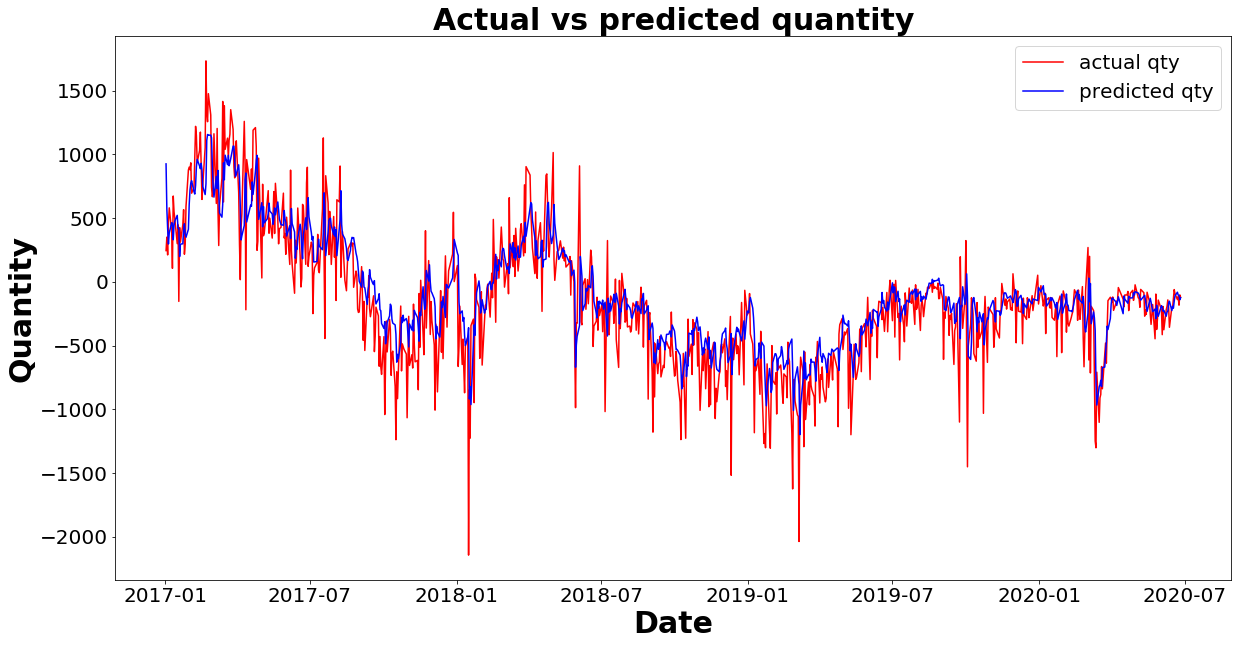

In [68]:
# Graphe montrant la comparaison entre la quantité réelle et la quantité prédite:
fig, ax1 = plt.subplots(figsize=(20,10))

color1 = 'red'
color2 = 'blue'
ax1.set_xlabel('Date', fontsize = 30, fontweight = 'bold')
ax1.set_ylabel('Quantity', color='black', fontsize = 30, fontweight = 'bold')
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)
ax1.plot(df6_2017['date'], df6_2017['qty'], color=color1, label='actual qty')
ax1.plot(df6_2017['date'], df6_2017['pred'], color=color2, label ='predicted qty')

plt.title('Actual vs predicted quantity', fontsize=30, fontweight = 'bold')
ax1.legend(fontsize=20)

plt.show()

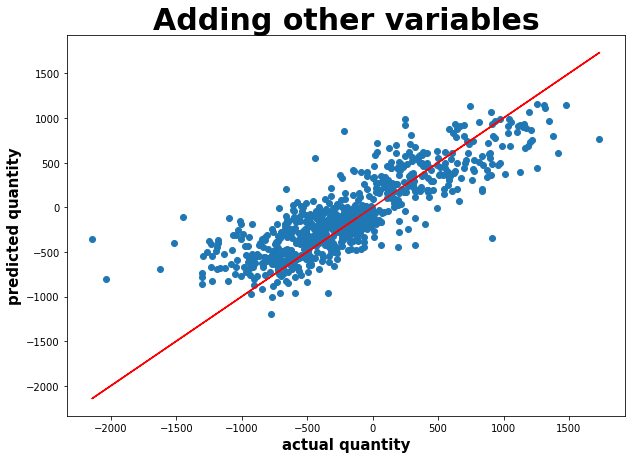

In [70]:
# Visualisation de l'erreur sur une prédiction à 24h:
plt.subplots(figsize=(10,7))
plt.scatter(x = 'qty', y= 'pred', data=df6_2017);
plt.plot(df6_2017['qty'], df6_2017['qty'],color='red');
plt.xlabel('actual quantity', fontsize = 15, fontweight = 'bold')
plt.ylabel('predicted quantity', color='black', fontsize = 15, fontweight = 'bold')
plt.title('Adding other variables', color='black', fontsize = 30, fontweight = 'bold');

In [71]:
Moyenne = df6_2017['qty'].mean()
num = 0
denum = 0
for i in range(len(df6_2017)):
    num += (df6_2017.loc[i,'qty'] - df6_2017.loc[i,'pred'])**2
    denum += (df6_2017.loc[i,'qty'] - Moyenne)**2
R2 = 1 - (num/denum)
print(f"R2 score: {round(R2,2)}")

R2 score: 0.68


In [72]:
# Feature ranking:
from sklearn.feature_selection import f_regression
feature_importance = f_regression(X_6, y_6)
feature_ranking = pd.DataFrame(columns=X_6.columns, data=feature_importance, index=["f-score", "p-value"]).transpose().sort_values(["f-score", "p-value"], ascending=False)
feature_ranking

C:\Users\Remi\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,f-score,p-value
qty -1,3270.241229,0.000000e+00
qty -2,2760.136066,0.000000e+00
qty -3,2391.432783,0.000000e+00
fund/benchm ratio,83.890210,1.034854e-19
price,43.390762,5.412320e-11
benchmprice,26.969751,2.227612e-07
share dly growth,1.674817,1.957302e-01
ratio dly growth,0.795739,3.724534e-01
benchm dly growth,0.092957,7.604757e-01


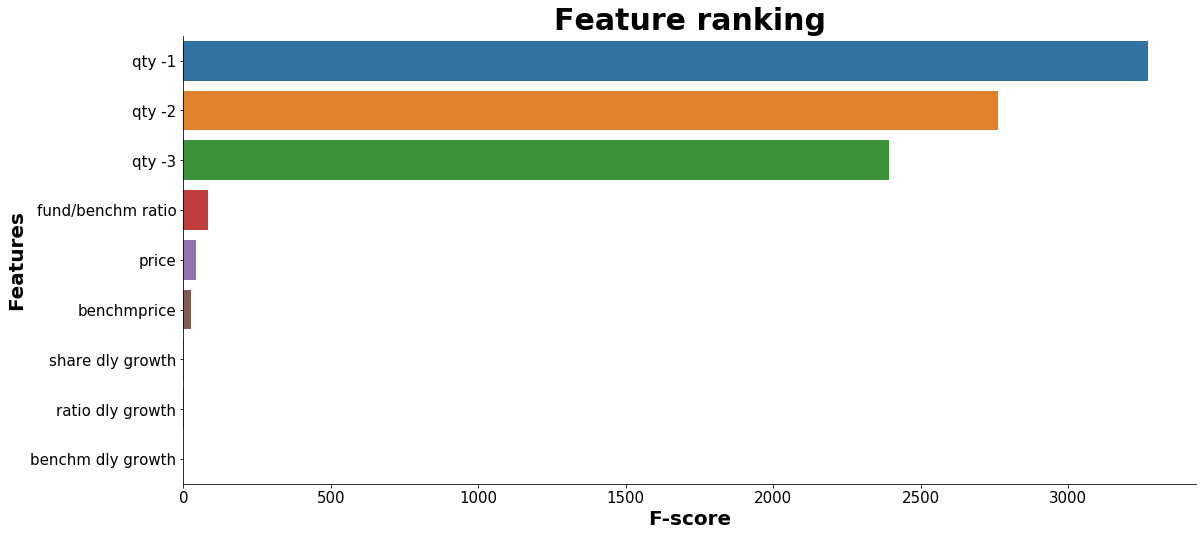

In [92]:
# Graphe pour le feature ranking
sns.catplot(x=[value for value in feature_ranking['f-score'].values], y=[index for index in feature_ranking.index], data=feature_ranking, kind="bar", legend=False, height=8, aspect=2)
plt.xlabel('F-score', fontsize=20, fontweight= 'bold')
plt.ylabel('Features', fontsize=20, fontweight= 'bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Feature ranking', fontsize=30, fontweight= 'bold')
plt.show();

In [93]:
# Matrice de corrélation:
df6.corr()

,price,benchmprice,qty,fund/benchm ratio,share dly growth,benchm dly growth,ratio dly growth,qty -1,qty -2,qty -3,pred
price,1.000000,0.978074,-0.128510,0.914162,-0.032735,-0.039024,-0.000072,-0.128886,-0.129873,-0.130830,0.566545
benchmprice,0.978074,1.000000,-0.101634,0.809868,-0.025432,-0.018858,-0.008664,-0.102652,-0.104313,-0.106002,0.496885
qty,-0.128510,-0.101634,1.000000,-0.177326,0.025451,0.005998,0.017546,0.747403,0.718665,0.693288,0.837137
fund/benchm ratio,0.914162,0.809868,-0.177326,1.000000,-0.042807,-0.074072,0.017208,-0.176359,-0.175898,-0.175299,0.507437
share dly growth,-0.032735,-0.025432,0.025451,-0.042807,1.000000,0.231419,0.697350,0.024015,0.014843,0.027959,0.052884
benchm dly growth,-0.039024,-0.018858,0.005998,-0.074072,0.231419,1.000000,-0.535888,-0.012550,-0.022387,-0.014214,0.015078
ratio dly growth,-0.000072,-0.008664,0.017546,0.017208,0.697350,-0.535888,1.000000,0.030036,0.029328,0.034836,0.043585
qty -1,-0.128886,-0.102652,0.747403,-0.176359,0.024015,-0.012550,0.030036,1.000000,0.747538,0.718795,0.945092
qty -2,-0.129873,-0.104313,0.718665,-0.175898,0.014843,-0.022387,0.029328,0.747538,1.000000,0.747870,0.910859
qty -3,-0.130830,-0.106002,0.693288,-0.175299,0.027959,-0.014214,0.034836,0.718795,0.747870,1.000000,0.886115


In [114]:
# Correlations between target variable quantity and features:
corr = df6.corr().loc[:,['qty']].drop(['qty','pred'], axis=0)
corr['abs']=corr['qty'].apply(lambda x: np.abs(x))
corr = corr.sort_values('abs',ascending=False)
corr.drop('abs', axis=1)

,qty
qty -1,0.747403
qty -2,0.718665
qty -3,0.693288
fund/benchm ratio,-0.177326
price,-0.128510
benchmprice,-0.101634
share dly growth,0.025451
ratio dly growth,0.017546
benchm dly growth,0.005998


In [105]:
# Linear regression coefficients:
regressor.fit(X_train, y_train)
coefs = pd.DataFrame(index=X_6.columns, data = regressor.coef_.transpose(), columns=["coefficients"])
coefs['abs']=coefs['coefficients'].apply(lambda x: np.abs(x))
coefs = coefs.sort_values(by="abs", ascending=False).drop('abs', axis=1)
coefs

,coefficients
price,7448.576578
ratio dly growth,-6458.039540
share dly growth,5606.767246
benchmprice,-5131.286021
benchm dly growth,-4750.181394
fund/benchm ratio,-2678.497899
qty -1,250.255780
qty -2,160.476898
qty -3,125.367121


### Case 4: Removing dly growth variables

In [103]:
# Removing feature that are not important:
df7= df6.drop(['share dly growth','ratio dly growth','benchm dly growth','pred'], axis=1)
df7.head()

,date,price,benchmprice,qty,fund/benchm ratio,qty -1,qty -2,qty -3
0,2010-01-07,1497.61,153.81,862.399,9.736753,770.274,1177.903,1389.470
1,2010-01-08,1498.45,153.93,431.460,9.734620,862.399,770.274,1177.903
2,2010-01-11,1500.09,154.02,1087.540,9.739579,431.460,862.399,770.274
3,2010-01-12,1500.68,153.99,1744.314,9.745308,1087.540,431.460,862.399
4,2010-01-13,1500.89,153.95,833.172,9.749204,1744.314,1087.540,431.460


In [104]:
# Defining features and target variable:
X_7 = df7.drop(['date','qty'], axis = 1)
y_7 = df7.loc[:,['qty']]

In [105]:
# Making predictions from January 2nd 2017 until end of June 2020. Model is trained iteratively on available history on ith day

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
for i in range(df7[df7['date']=='2017-01-02'].index[0], len(df7)):
    X_train = X_7.iloc[:i,:]
    y_train = y_7.iloc[:i,:]
    X_test = X_7.iloc[i,:]
    y_test = y_7.iloc[i,:]
    X_test = pd.DataFrame(data=np.array(X_test).reshape(1, -1),index={len(X_train)},columns=X_train.columns)
    X_train = pd.DataFrame(sc_x.fit_transform(X_train), columns = X_train.columns, index= X_train.index)
    X_test = pd.DataFrame(sc_x.transform(X_test), columns = X_test.columns, index=X_test.index)
    regressor.fit(X_train, y_train)
    df7.loc[i,'pred'] = regressor.predict(X_test)[0][0]

In [123]:
df7_2017=df7[df7['date'] >= '2017-01-01'].reset_index(drop=True)
df7_2017.head()

,date,price,benchmprice,qty,fund/benchm ratio,qty -1,qty -2,qty -3,pred
0,2017-01-02,1750.20,170.0155,245.507,10.294356,727.876,1296.547,1642.209,920.428864
1,2017-01-03,1752.20,169.9803,351.124,10.308253,245.507,727.876,1296.547,568.474219
2,2017-01-04,1752.35,169.9884,211.706,10.308645,351.124,245.507,727.876,413.535937
3,2017-01-05,1751.71,169.8038,460.248,10.316082,211.706,351.124,245.507,306.117420
4,2017-01-06,1752.32,169.7919,580.716,10.320398,460.248,211.706,351.124,381.924359


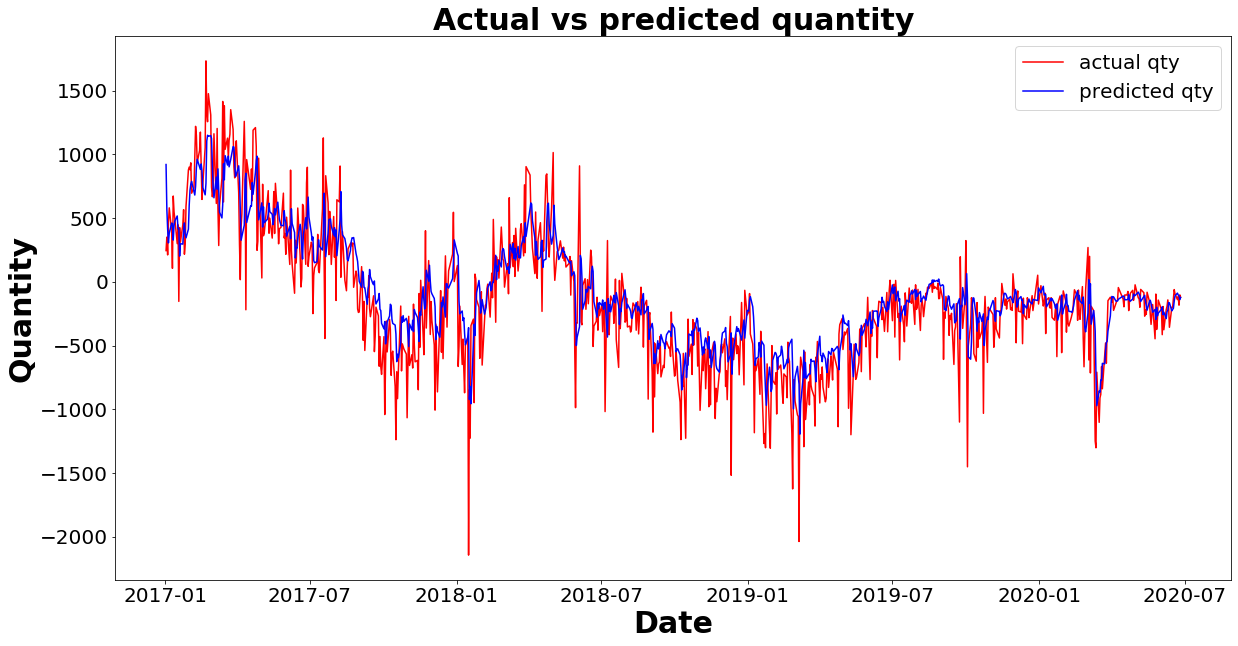

In [124]:
# Graphe montrant la comparaison entre la quantité réelle et la quantité prédite:
fig, ax1 = plt.subplots(figsize=(20,10))

color1 = 'red'
color2 = 'blue'
ax1.set_xlabel('Date', fontsize = 30, fontweight = 'bold')
ax1.set_ylabel('Quantity', color='black', fontsize = 30, fontweight = 'bold')
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)
ax1.plot(df7_2017['date'], df7_2017['qty'], color=color1, label='actual qty')
ax1.plot(df7_2017['date'], df7_2017['pred'], color=color2, label ='predicted qty')

plt.title('Actual vs predicted quantity', fontsize=30, fontweight = 'bold')
ax1.legend(fontsize=20)

plt.show()

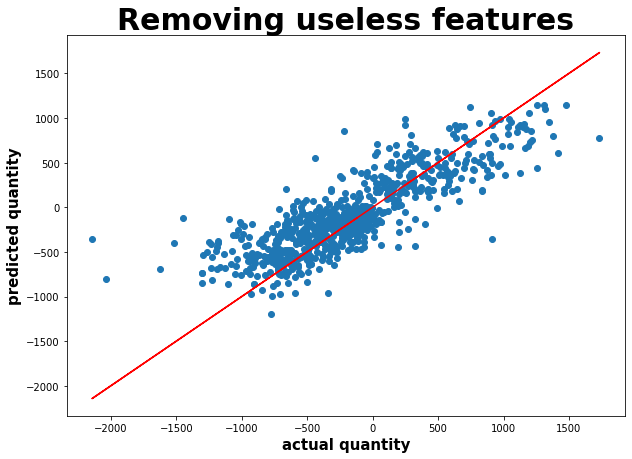

In [126]:
# Visualisation de l'erreur sur une prédiction à 24h:
plt.subplots(figsize=(10,7))
plt.scatter(x = 'qty', y= 'pred', data=df7_2017);
plt.plot(df7_2017['qty'], df7_2017['qty'],color='red');
plt.xlabel('actual quantity', fontsize = 15, fontweight = 'bold')
plt.ylabel('predicted quantity', color='black', fontsize = 15, fontweight = 'bold')
plt.title('Removing useless features', color='black', fontsize = 30, fontweight = 'bold');

In [127]:
Moyenne = df7_2017['qty'].mean()
num = 0
denum = 0
for i in range(len(df7_2017)):
    num += (df7_2017.loc[i,'qty'] - df7_2017.loc[i,'pred'])**2
    denum += (df7_2017.loc[i,'qty'] - Moyenne)**2
R2 = 1 - (num/denum)
print(f"R2 score: {round(R2,2)}")

R2 score: 0.67


### Case 5: Adding external variables (CAC40)

In [19]:
CAC_40 = web.DataReader('^FCHI', data_source='yahoo', start='2009-12-31', end='2020-06-26')
CAC_40 = CAC_40.loc[:,['Open']]
CAC_40['date']=CAC_40.index
CAC_40 = CAC_40.reset_index(drop=True)
CAC_40.head()

,Open,date
0,3952.530029,2009-12-31
1,3952.209961,2010-01-04
2,4012.429932,2010-01-05
3,4014.449951,2010-01-06
4,4005.959961,2010-01-07


In [107]:
# Adding CAC40 data to df5 dataset
df8 = df5.merge(right=CAC_40,on='date')

In [108]:
df8 = df8.rename(columns={"Open": "CAC40"})

In [109]:
# Adding CAC40 at day -1 as a new variable
for i in range(1,len(df8)):
    df8.loc[i,'CAC40 -1'] = df8.loc[i-1,'CAC40']

In [110]:
df8.head()

,date,price,benchmprice,qty,fund/benchm ratio,share dly growth,benchm dly growth,ratio dly growth,qty -1,qty -2,qty -3,CAC40,CAC40 -1
0,2009-12-31,1492.40,153.62,1389.470,9.714881,NaN,NaN,NaN,NaN,NaN,NaN,3952.530029,NaN
1,2010-01-05,1494.77,153.68,1177.903,9.726510,0.001588,0.000391,0.001197,1389.470,NaN,NaN,4012.429932,3952.530029
2,2010-01-06,1495.60,153.71,770.274,9.730011,0.000555,0.000195,0.000360,1177.903,1389.470,NaN,4014.449951,4012.429932
3,2010-01-07,1497.61,153.81,862.399,9.736753,0.001344,0.000651,0.000693,770.274,1177.903,1389.470,4005.959961,4014.449951
4,2010-01-08,1498.45,153.93,431.460,9.734620,0.000561,0.000780,-0.000219,862.399,770.274,1177.903,4042.639893,4005.959961


In [111]:
df8 = df8.loc[df8['qty -3'].notnull(),:]
df8 = df8.reset_index(drop=True)
df8.head()

,date,price,benchmprice,qty,fund/benchm ratio,share dly growth,benchm dly growth,ratio dly growth,qty -1,qty -2,qty -3,CAC40,CAC40 -1
0,2010-01-07,1497.61,153.81,862.399,9.736753,0.001344,0.000651,0.000693,770.274,1177.903,1389.470,4005.959961,4014.449951
1,2010-01-08,1498.45,153.93,431.460,9.734620,0.000561,0.000780,-0.000219,862.399,770.274,1177.903,4042.639893,4005.959961
2,2010-01-11,1500.09,154.02,1087.540,9.739579,0.001094,0.000585,0.000509,431.460,862.399,770.274,4071.399902,4042.639893
3,2010-01-12,1500.68,153.99,1744.314,9.745308,0.000393,-0.000195,0.000588,1087.540,431.460,862.399,4044.189941,4071.399902
4,2010-01-13,1500.89,153.95,833.172,9.749204,0.000140,-0.000260,0.000400,1744.314,1087.540,431.460,3979.939941,4044.189941


In [140]:
X_8 = df8.drop(['date','qty'], axis = 1)
y_8 = df8.loc[:,['qty']]

In [141]:
# Making predictions from January 2nd 2017 until end of June 2020. Model is trained iteratively on available history on ith day

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
for i in range(df8[df8['date']=='2017-01-02'].index[0], len(df8)):
    X_train = X_8.iloc[:i,:]
    y_train = y_8.iloc[:i,:]
    X_test = X_8.iloc[i,:]
    y_test = y_8.iloc[i,:]
    X_test = pd.DataFrame(data=np.array(X_test).reshape(1, -1),index={len(X_train)},columns=X_train.columns)
    X_train = pd.DataFrame(sc_x.fit_transform(X_train), columns = X_train.columns, index= X_train.index)
    X_test = pd.DataFrame(sc_x.transform(X_test), columns = X_test.columns, index=X_test.index)
    regressor.fit(X_train, y_train)
    df8.loc[i,'pred'] = regressor.predict(X_test)[0][0]

In [142]:
df8_2017=df8[df8['date'] >= '2017-01-01'].reset_index(drop=True)
df8_2017.head()

,date,price,benchmprice,qty,fund/benchm ratio,share dly growth,benchm dly growth,ratio dly growth,qty -1,qty -2,qty -3,CAC40,CAC40 -1,pred
0,2017-01-02,1750.20,170.0155,245.507,10.294356,-0.000257,-0.000074,-0.000183,727.876,1296.547,1642.209,4845.959961,4837.680176,918.450231
1,2017-01-03,1752.20,169.9803,351.124,10.308253,0.001143,-0.000207,0.001350,245.507,727.876,1296.547,4904.770020,4845.959961,565.749156
2,2017-01-04,1752.35,169.9884,211.706,10.308645,0.000086,0.000048,0.000038,351.124,245.507,727.876,4912.950195,4904.770020,412.359936
3,2017-01-05,1751.71,169.8038,460.248,10.316082,-0.000365,-0.001086,0.000722,211.706,351.124,245.507,4881.720215,4912.950195,289.760888
4,2017-01-06,1752.32,169.7919,580.716,10.320398,0.000348,-0.000070,0.000418,460.248,211.706,351.124,4885.189941,4881.720215,380.624260


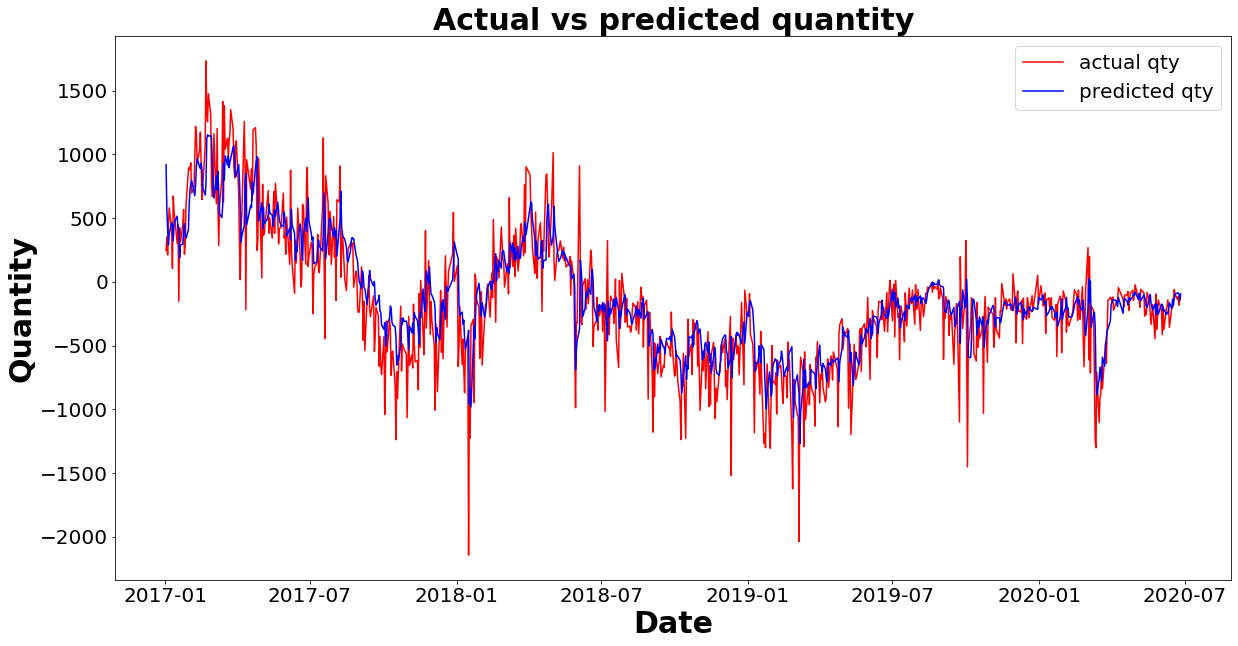

In [143]:
# Graphe montrant la comparaison entre la quantité réelle et la quantité prédite:
fig, ax1 = plt.subplots(figsize=(20,10))

color1 = 'red'
color2 = 'blue'
ax1.set_xlabel('Date', fontsize = 30, fontweight = 'bold')
ax1.set_ylabel('Quantity', color='black', fontsize = 30, fontweight = 'bold')
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)
ax1.plot(df8_2017['date'], df8_2017['qty'], color=color1, label='actual qty')
ax1.plot(df8_2017['date'], df8_2017['pred'], color=color2, label ='predicted qty')

plt.title('Actual vs predicted quantity', fontsize=30, fontweight = 'bold')
ax1.legend(fontsize=20)

plt.show()

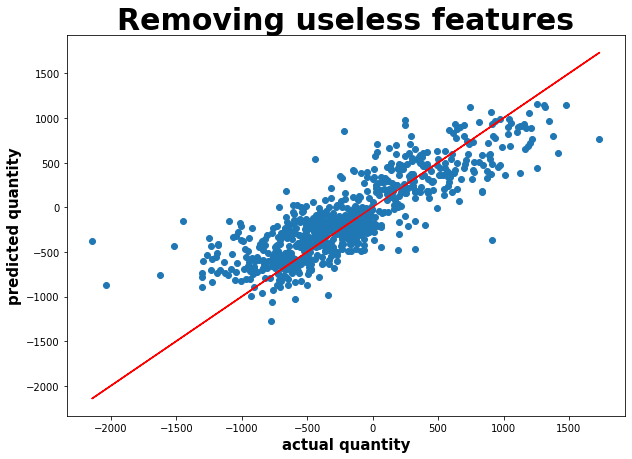

In [144]:
# Visualisation de l'erreur sur une prédiction à 24h:
plt.subplots(figsize=(10,7))
plt.scatter(x = 'qty', y= 'pred', data=df8_2017);
plt.plot(df8_2017['qty'], df8_2017['qty'],color='red');
plt.xlabel('actual quantity', fontsize = 15, fontweight = 'bold')
plt.ylabel('predicted quantity', color='black', fontsize = 15, fontweight = 'bold')
plt.title('Removing useless features', color='black', fontsize = 30, fontweight = 'bold');

In [145]:
Moyenne = df8_2017['qty'].mean()
num = 0
denum = 0
for i in range(len(df8_2017)):
    num += (df8_2017.loc[i,'qty'] - df8_2017.loc[i,'pred'])**2
    denum += (df8_2017.loc[i,'qty'] - Moyenne)**2
R2 = 1 - (num/denum)
print(f"R2 score: {round(R2,2)}")

R2 score: 0.69


In [146]:
# Correlations between target variable quantity and features:
corr = df8.corr().loc[:,['qty']].drop(['qty','pred'], axis=0)
corr['abs']=corr['qty'].apply(lambda x: np.abs(x))
corr = corr.sort_values('abs',ascending=False)
corr.drop('abs', axis=1)

,qty
qty -1,0.751677
qty -2,0.719863
qty -3,0.693696
fund/benchm ratio,-0.173542
price,-0.124159
CAC40 -1,-0.120110
CAC40,-0.119051
benchmprice,-0.097251
share dly growth,0.025504
ratio dly growth,0.017338


In [147]:
# Feature ranking:
from sklearn.feature_selection import f_regression
feature_importance = f_regression(X_8, y_8)
feature_ranking = pd.DataFrame(columns=X_8.columns, data=feature_importance, index=["f-score", "p-value"]).transpose().sort_values(["f-score", "p-value"], ascending=False)
feature_ranking

C:\Users\Remi\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,f-score,p-value
qty -1,3342.188059,0.000000e+00
qty -2,2767.425963,0.000000e+00
qty -3,2386.653299,0.000000e+00
fund/benchm ratio,79.896591,7.355188e-19
price,40.284815,2.585614e-10
CAC40 -1,37.662632,9.709484e-10
CAC40,36.991800,1.362836e-09
benchmprice,24.567210,7.642520e-07
share dly growth,1.674752,1.957394e-01
ratio dly growth,0.773649,3.791727e-01


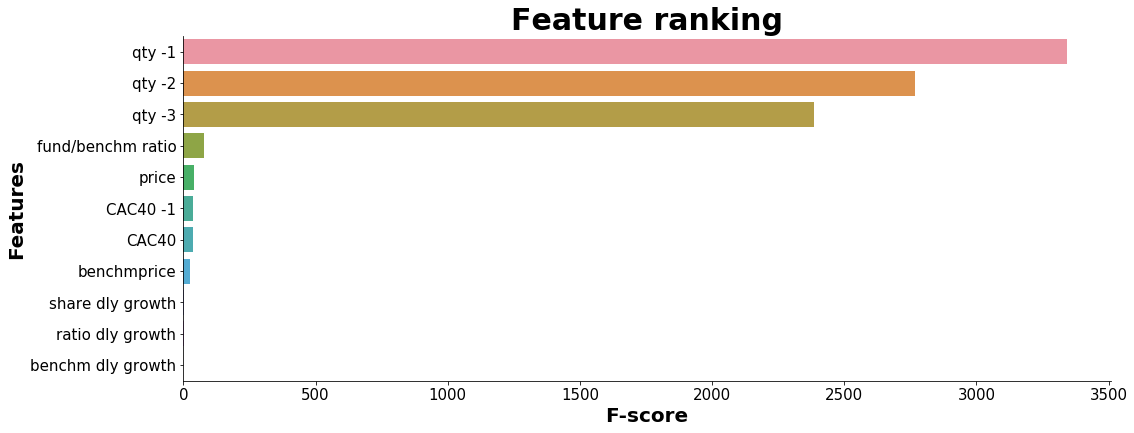

In [148]:
# Graphe pour le feature ranking
sns.catplot(x=[value for value in feature_ranking['f-score'].values], y=[index for index in feature_ranking.index], data=feature_ranking, kind="bar", legend=False, height=8, aspect=2)
plt.xlabel('F-score', fontsize=20, fontweight= 'bold')
plt.ylabel('Features', fontsize=20, fontweight= 'bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Feature ranking', fontsize=30, fontweight= 'bold')
plt.show();

## Decison trees

In [479]:
# Visualisation du dataset
df8 = df8.drop('pred', axis=1)
df8.head()

,date,price,benchmprice,qty,fund/benchm ratio,share dly growth,benchm dly growth,ratio dly growth,qty -1,qty -2,qty -3,CAC40,CAC40 -1
0,2010-01-07,1497.61,153.81,862.399,9.736753,0.001344,0.000651,0.000693,770.274,1177.903,1389.470,4005.959961,4014.449951
1,2010-01-08,1498.45,153.93,431.460,9.734620,0.000561,0.000780,-0.000219,862.399,770.274,1177.903,4042.639893,4005.959961
2,2010-01-11,1500.09,154.02,1087.540,9.739579,0.001094,0.000585,0.000509,431.460,862.399,770.274,4071.399902,4042.639893
3,2010-01-12,1500.68,153.99,1744.314,9.745308,0.000393,-0.000195,0.000588,1087.540,431.460,862.399,4044.189941,4071.399902
4,2010-01-13,1500.89,153.95,833.172,9.749204,0.000140,-0.000260,0.000400,1744.314,1087.540,431.460,3979.939941,4044.189941


In [480]:
#Définition des variables explicatives et cibles:
X_8 = df8.drop(['date','qty'], axis = 1)
y_8 = df8.loc[:,['qty']]

In [481]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_8, y_8, test_size = 0.2, random_state=0)

In [503]:
from sklearn.tree import DecisionTreeRegressor
Regressor = DecisionTreeRegressor(criterion="mse", max_depth=4)
Regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [504]:
Regressor.score(X_train, y_train)

0.695541055885524

In [505]:
Regressor.score(X_test, y_test)

0.6188534941185693

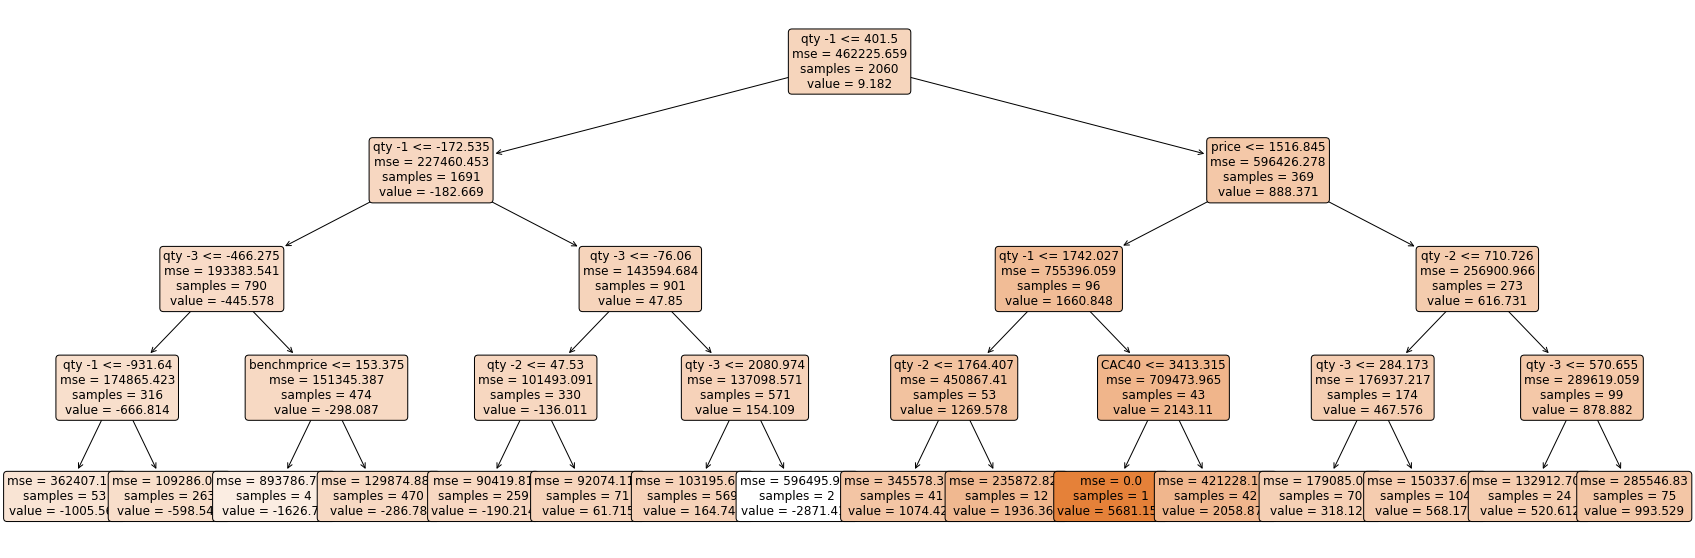

In [507]:
# Visualisation de l'arbre de décision
from sklearn.tree import plot_tree

plt.figure(figsize=(30,10))
a = plot_tree(Regressor, 
              feature_names=X_8.columns,  
              filled=True,
              rounded=True,
              fontsize=12)

In [508]:
# Making predictions from January 2nd 2017 until end of June 2020. Model is trained iteratively on available history on ith day

from sklearn.tree import DecisionTreeRegressor
Regressor = DecisionTreeRegressor(criterion="mse", max_depth=4)

for i in range(df8[df8['date']=='2017-01-02'].index[0], len(df8)):
    X_train = X_8.iloc[:i,:]
    y_train = y_8.iloc[:i,:]
    X_test = X_8.iloc[i,:]
    y_test = y_8.iloc[i,:]
    X_test = pd.DataFrame(data=np.array(X_test).reshape(1, -1),index={len(X_train)},columns=X_train.columns)
    X_train = pd.DataFrame(X_train, columns = X_train.columns, index= X_train.index)
    Regressor.fit(X_train, y_train)
    df8.loc[i,'pred'] = Regressor.predict(X_test)[0]

In [509]:
df8_2017=df8[df8['date'] >= '2017-01-01'].reset_index(drop=True)
df8_2017.head()

,date,price,benchmprice,qty,fund/benchm ratio,share dly growth,benchm dly growth,ratio dly growth,qty -1,qty -2,qty -3,CAC40,CAC40 -1,pred
0,2017-01-02,1750.20,170.0155,245.507,10.294356,-0.000257,-0.000074,-0.000183,727.876,1296.547,1642.209,4845.959961,4837.680176,816.610545
1,2017-01-03,1752.20,169.9803,351.124,10.308253,0.001143,-0.000207,0.001350,245.507,727.876,1296.547,4904.770020,4845.959961,239.882884
2,2017-01-04,1752.35,169.9884,211.706,10.308645,0.000086,0.000048,0.000038,351.124,245.507,727.876,4912.950195,4904.770020,240.261255
3,2017-01-05,1751.71,169.8038,460.248,10.316082,-0.000365,-0.001086,0.000722,211.706,351.124,245.507,4881.720215,4912.950195,240.164458
4,2017-01-06,1752.32,169.7919,580.716,10.320398,0.000348,-0.000070,0.000418,460.248,211.706,351.124,4885.189941,4881.720215,799.813382


In [510]:
df8_2017.loc[:15,['date','qty', 'pred']]

,date,qty,pred
0,2017-01-02,245.507,816.610545
1,2017-01-03,351.124,239.882884
2,2017-01-04,211.706,240.261255
3,2017-01-05,460.248,240.164458
4,2017-01-06,580.716,799.813382
5,2017-01-09,398.752,793.553457
6,2017-01-10,106.418,240.907983
7,2017-01-11,673.368,240.455155
8,2017-01-12,550.202,782.586750
9,2017-01-13,493.802,776.306081


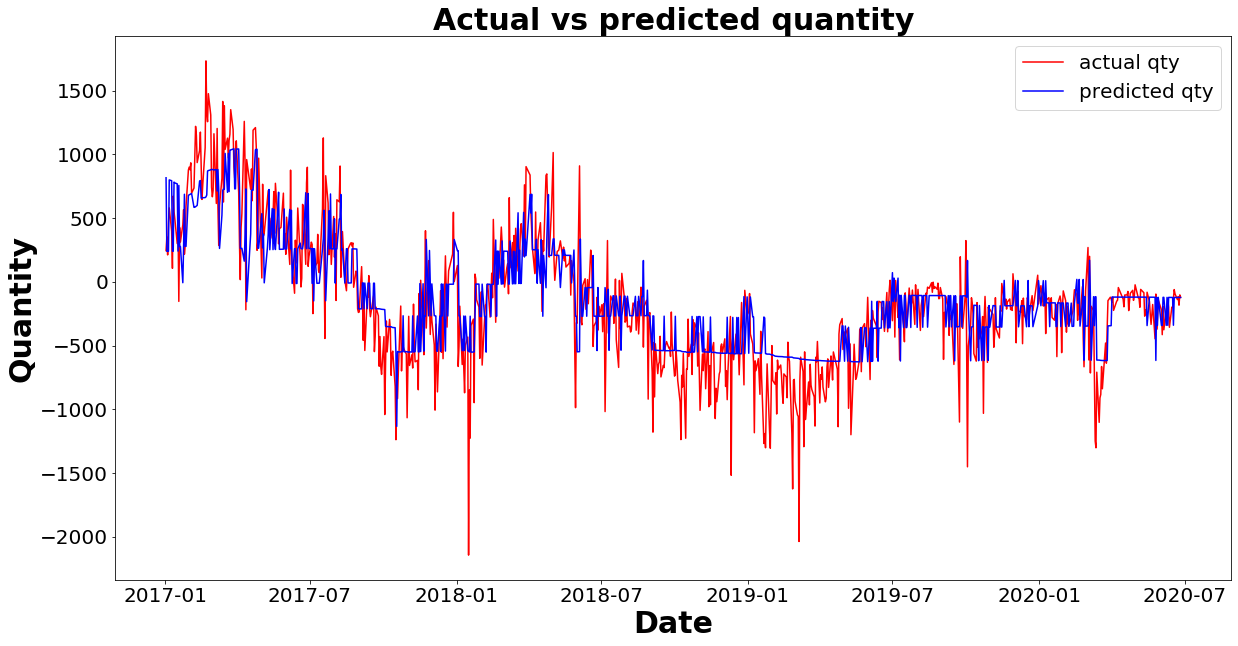

In [511]:
# Graphe montrant la comparaison entre la quantité réelle et la quantité prédite:
fig, ax1 = plt.subplots(figsize=(20,10))

color1 = 'red'
color2 = 'blue'
ax1.set_xlabel('Date', fontsize = 30, fontweight = 'bold')
ax1.set_ylabel('Quantity', color='black', fontsize = 30, fontweight = 'bold')
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)
ax1.plot(df8_2017['date'], df8_2017['qty'], color=color1, label='actual qty')
ax1.plot(df8_2017['date'], df8_2017['pred'], color=color2, label ='predicted qty')

plt.title('Actual vs predicted quantity', fontsize=30, fontweight = 'bold')
ax1.legend(fontsize=20)

plt.show()

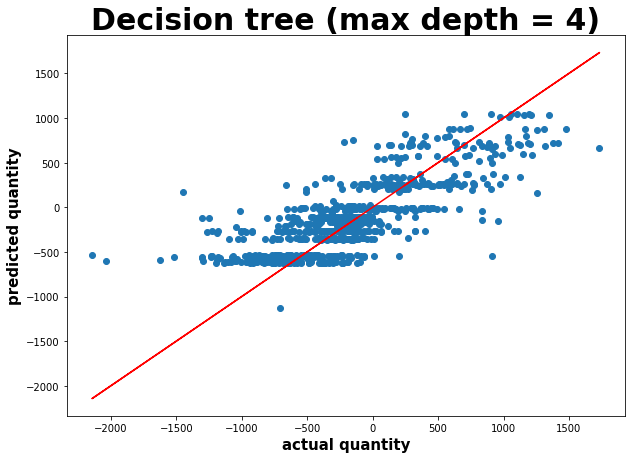

In [512]:
# Visualisation de l'erreur sur une prédiction à 24h:
plt.subplots(figsize=(10,7))
plt.scatter(x = 'qty', y= 'pred', data=df8_2017);
plt.plot(df8_2017['qty'], df8_2017['qty'],color='red');
plt.xlabel('actual quantity', fontsize = 15, fontweight = 'bold')
plt.ylabel('predicted quantity', color='black', fontsize = 15, fontweight = 'bold')
plt.title('Decision tree (max depth = 4)', color='black', fontsize = 30, fontweight = 'bold');

In [513]:
Moyenne = df8_2017['qty'].mean()
num = 0
denum = 0
for i in range(len(df8_2017)):
    num += (df8_2017.loc[i,'qty'] - df8_2017.loc[i,'pred'])**2
    denum += (df8_2017.loc[i,'qty'] - Moyenne)**2
R2 = 1 - (num/denum)
print(f"R2 score: {round(R2,2)}")

R2 score: 0.61


## Random forest

In [514]:
# Visualisation du dataset
df8 = df8.drop('pred', axis=1)
df8.head()

,date,price,benchmprice,qty,fund/benchm ratio,share dly growth,benchm dly growth,ratio dly growth,qty -1,qty -2,qty -3,CAC40,CAC40 -1
0,2010-01-07,1497.61,153.81,862.399,9.736753,0.001344,0.000651,0.000693,770.274,1177.903,1389.470,4005.959961,4014.449951
1,2010-01-08,1498.45,153.93,431.460,9.734620,0.000561,0.000780,-0.000219,862.399,770.274,1177.903,4042.639893,4005.959961
2,2010-01-11,1500.09,154.02,1087.540,9.739579,0.001094,0.000585,0.000509,431.460,862.399,770.274,4071.399902,4042.639893
3,2010-01-12,1500.68,153.99,1744.314,9.745308,0.000393,-0.000195,0.000588,1087.540,431.460,862.399,4044.189941,4071.399902
4,2010-01-13,1500.89,153.95,833.172,9.749204,0.000140,-0.000260,0.000400,1744.314,1087.540,431.460,3979.939941,4044.189941


In [515]:
#Définition des variables explicatives et cibles:
X_8 = df8.drop(['date','qty'], axis = 1)
y_8 = df8.loc[:,'qty']

In [516]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_8, y_8, test_size = 0.2, random_state=0)

In [531]:
%%time
from sklearn.ensemble import RandomForestRegressor
Regressor = RandomForestRegressor(n_estimators=500, criterion="mse", max_depth=6, max_samples=500)
Regressor.fit(X_train, y_train)

Wall time: 2.47 s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=500, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [518]:
Regressor.score(X_train, y_train)

0.6820885637284597

In [519]:
Regressor.score(X_test, y_test)

0.6786319379791195

In [524]:
# Grid search afin de déterminer les paramètres optimaux:
from sklearn.model_selection import GridSearchCV
rf_regressor_grid = RandomForestRegressor()
params = {"n_estimators": [10, 50, 100, 500],
          "max_depth" : range(4,9),
          "max_samples" : [10, 50, 100, 500]
          }

Regressor = GridSearchCV(cv=10, estimator = rf_regressor_grid, param_grid = params, n_jobs=-1, verbose=3).fit(X_train, y_train)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:   53.0s
[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:  2.7min finished


In [525]:
Regressor.best_params_

{'max_depth': 6, 'max_samples': 500, 'n_estimators': 500}

In [522]:
Regressor.best_estimator_.score(X_train, y_train)

0.805190517749628

In [526]:
Regressor.best_estimator_.score(X_test, y_test)

0.6559919555356144

In [533]:
# Making predictions from January 2nd 2017 until end of June 2020. Model is trained iteratively on available history on ith day

from sklearn.ensemble import RandomForestRegressor
Regressor = RandomForestRegressor(n_estimators=500, criterion="mse", max_depth=6, max_samples=500)

for i in range(df8[df8['date']=='2017-01-02'].index[0], len(df8)):
    X_train = X_8.iloc[:i,:]
    y_train = y_8[:i]
    X_test = X_8.iloc[i,:]
    y_test = y_8[i]
    X_test = pd.DataFrame(data=np.array(X_test).reshape(1, -1),index={len(X_train)},columns=X_train.columns)
    X_train = pd.DataFrame(X_train, columns = X_train.columns, index= X_train.index)
    Regressor.fit(X_train, y_train)
    df8.loc[i,'pred'] = Regressor.predict(X_test)[0]

In [534]:
df8_2017=df8[df8['date'] >= '2017-01-01'].reset_index(drop=True)
df8_2017.head()

,date,price,benchmprice,qty,fund/benchm ratio,share dly growth,benchm dly growth,ratio dly growth,qty -1,qty -2,qty -3,CAC40,CAC40 -1,pred
0,2017-01-02,1750.20,170.0155,245.507,10.294356,-0.000257,-0.000074,-0.000183,727.876,1296.547,1642.209,4845.959961,4837.680176,918.832625
1,2017-01-03,1752.20,169.9803,351.124,10.308253,0.001143,-0.000207,0.001350,245.507,727.876,1296.547,4904.770020,4845.959961,480.678664
2,2017-01-04,1752.35,169.9884,211.706,10.308645,0.000086,0.000048,0.000038,351.124,245.507,727.876,4912.950195,4904.770020,404.554537
3,2017-01-05,1751.71,169.8038,460.248,10.316082,-0.000365,-0.001086,0.000722,211.706,351.124,245.507,4881.720215,4912.950195,258.600363
4,2017-01-06,1752.32,169.7919,580.716,10.320398,0.000348,-0.000070,0.000418,460.248,211.706,351.124,4885.189941,4881.720215,445.125547


In [535]:
df8_2017.loc[:15,['date','qty', 'pred']]

,date,qty,pred
0,2017-01-02,245.507,918.832625
1,2017-01-03,351.124,480.678664
2,2017-01-04,211.706,404.554537
3,2017-01-05,460.248,258.600363
4,2017-01-06,580.716,445.125547
5,2017-01-09,398.752,543.232779
6,2017-01-10,106.418,498.634308
7,2017-01-11,673.368,285.774702
8,2017-01-12,550.202,527.242005
9,2017-01-13,493.802,440.637084


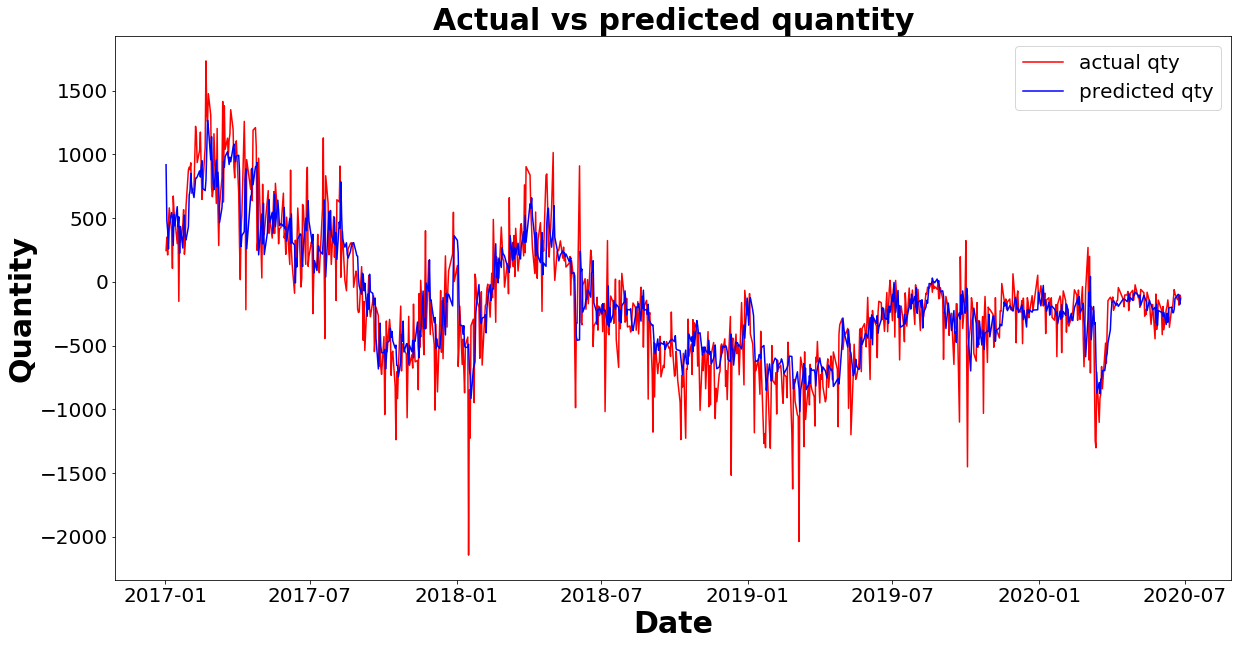

In [536]:
# Graphe montrant la comparaison entre la quantité réelle et la quantité prédite:
fig, ax1 = plt.subplots(figsize=(20,10))

color1 = 'red'
color2 = 'blue'
ax1.set_xlabel('Date', fontsize = 30, fontweight = 'bold')
ax1.set_ylabel('Quantity', color='black', fontsize = 30, fontweight = 'bold')
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)
ax1.plot(df8_2017['date'], df8_2017['qty'], color=color1, label='actual qty')
ax1.plot(df8_2017['date'], df8_2017['pred'], color=color2, label ='predicted qty')

plt.title('Actual vs predicted quantity', fontsize=30, fontweight = 'bold')
ax1.legend(fontsize=20)

plt.show()

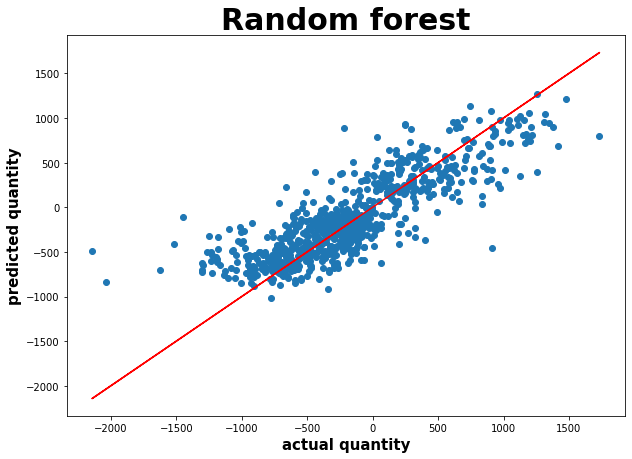

In [537]:
# Visualisation de l'erreur sur une prédiction à 24h:
plt.subplots(figsize=(10,7))
plt.scatter(x = 'qty', y= 'pred', data=df8_2017);
plt.plot(df8_2017['qty'], df8_2017['qty'],color='red');
plt.xlabel('actual quantity', fontsize = 15, fontweight = 'bold')
plt.ylabel('predicted quantity', color='black', fontsize = 15, fontweight = 'bold')
plt.title('Random forest', color='black', fontsize = 30, fontweight = 'bold');

In [538]:
Moyenne = df8_2017['qty'].mean()
num = 0
denum = 0
for i in range(len(df8_2017)):
    num += (df8_2017.loc[i,'qty'] - df8_2017.loc[i,'pred'])**2
    denum += (df8_2017.loc[i,'qty'] - Moyenne)**2
R2 = 1 - (num/denum)
print(f"R2 score: {round(R2,2)}")

R2 score: 0.69


### Case 6: Adding more external variables (EUR/USD)

In [88]:
EUR_USD = web.DataReader('EURUSD=X', data_source='yahoo', start='2009-12-31', end='2020-06-26')
EUR_USD.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,1.443897,1.431045,1.434206,1.432706,0.0,1.432706
2010-01-01,1.440196,1.432706,1.432706,1.438994,0.0,1.438994
2010-01-04,1.445191,1.426208,1.431004,1.442398,0.0,1.442398
2010-01-05,1.448310,1.435194,1.442710,1.436596,0.0,1.436596
2010-01-06,1.443460,1.429123,1.436596,1.440403,0.0,1.440403


In [9]:
Oil = web.DataReader('CL=F', data_source='yahoo', start='2009-12-31', end='2020-06-26')

In [10]:
Oil.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,80.000000,79.160004,79.279999,79.360001,120372.0,79.360001
2010-01-04,81.680000,79.629997,79.629997,81.510002,263542.0,81.510002
2010-01-05,82.000000,80.949997,81.629997,81.769997,258887.0,81.769997
2010-01-06,83.519997,80.849998,81.430000,83.180000,370059.0,83.180000
2010-01-07,83.360001,82.260002,83.199997,82.660004,246632.0,82.660004


In [11]:
Oil.shape

(2634, 6)

In [64]:
d = {'col1': [1, 2, 3, 4, 5], 'col2': [1, 2, None, None, 5]}
dummy = pd.DataFrame(data=d)
dummy.head()

,col1,col2
0,1,1.0
1,2,2.0
2,3,NaN
3,4,NaN
4,5,5.0


In [72]:
for i in range(len(dummy)):
    if pd.isna(dummy.loc[i,'col2']) == True:
        dummy.loc[i,'col2'] = dummy.loc[i-1,'col2']

In [73]:
dummy.head()

,col1,col2
0,1,1.0
1,2,2.0
2,3,2.0
3,4,2.0
4,5,5.0


## Fund A with all investors

In [9]:
df_1.head()

,investid,date,transaction,curr,qty,amtsharecurr,code,isfund,rdeur,sbeur,type,subtype,cntry
0,IB1,2009-12-31,NRD,EUR,-90.0,-134292.60,FR0010149120,0,-134292.60,0.0,Proprietary Desk,Proprietary Desk/Bank,France
1,IB1,2009-12-31,NSB,EUR,90.0,134292.60,FR0010149120,0,0.00,134292.6,Proprietary Desk,Proprietary Desk/Bank,France
2,IB1,2010-06-15,NRD,EUR,-33.0,-49804.92,FR0010149120,0,-49804.92,0.0,Proprietary Desk,Proprietary Desk/Bank,France
3,IB1,2010-07-26,NRD,EUR,-130.5,-197961.98,FR0010149120,0,-197961.98,0.0,Proprietary Desk,Proprietary Desk/Bank,France
4,IB1,2010-12-14,NRD,EUR,-18.0,-27537.12,FR0010149120,0,-27537.12,0.0,Proprietary Desk,Proprietary Desk/Bank,France


In [10]:
Fund_A = df_1[df_1['code']=='FR0010149120']
Fund_A.head()

,investid,date,transaction,curr,qty,amtsharecurr,code,isfund,rdeur,sbeur,type,subtype,cntry
0,IB1,2009-12-31,NRD,EUR,-90.0,-134292.60,FR0010149120,0,-134292.60,0.0,Proprietary Desk,Proprietary Desk/Bank,France
1,IB1,2009-12-31,NSB,EUR,90.0,134292.60,FR0010149120,0,0.00,134292.6,Proprietary Desk,Proprietary Desk/Bank,France
2,IB1,2010-06-15,NRD,EUR,-33.0,-49804.92,FR0010149120,0,-49804.92,0.0,Proprietary Desk,Proprietary Desk/Bank,France
3,IB1,2010-07-26,NRD,EUR,-130.5,-197961.98,FR0010149120,0,-197961.98,0.0,Proprietary Desk,Proprietary Desk/Bank,France
4,IB1,2010-12-14,NRD,EUR,-18.0,-27537.12,FR0010149120,0,-27537.12,0.0,Proprietary Desk,Proprietary Desk/Bank,France


### Daily trend

In [11]:
Fund_A_day = Fund_A.groupby('date').sum()
Fund_A_day['date']=Fund_A_day.index
Fund_A_day = Fund_A_day.reset_index(drop=True)
Fund_A_day.head()

,qty,amtsharecurr,isfund,rdeur,sbeur,date
0,14535.95200,21689809.70,1,-3128929.56,24818739.26,2009-12-31
1,3066.46700,4576395.36,0,-898596.41,5474991.77,2010-01-01
2,720.65892,1075511.37,0,-400165.32,1475676.69,2010-01-04
3,9274.86400,13845887.95,0,-7206517.91,21052405.86,2010-01-05
4,10405.27900,15553498.94,1,-3741504.91,19295003.85,2010-01-06


In [12]:
# Computing cumulative quantities for all investors in Fund A:
Fund_A_day.loc[0,'cum qty'] = Fund_A_day.loc[0,'qty']
for i in range(1, len(Fund_A_day)):
    Fund_A_day.loc[i,'cum qty'] = Fund_A_day.loc[i-1,'cum qty'] + Fund_A_day.loc[i,'qty']
Fund_A_day.head()

,qty,amtsharecurr,isfund,rdeur,sbeur,date,cum qty
0,14535.95200,21689809.70,1,-3128929.56,24818739.26,2009-12-31,14535.95200
1,3066.46700,4576395.36,0,-898596.41,5474991.77,2010-01-01,17602.41900
2,720.65892,1075511.37,0,-400165.32,1475676.69,2010-01-04,18323.07792
3,9274.86400,13845887.95,0,-7206517.91,21052405.86,2010-01-05,27597.94192
4,10405.27900,15553498.94,1,-3741504.91,19295003.85,2010-01-06,38003.22092


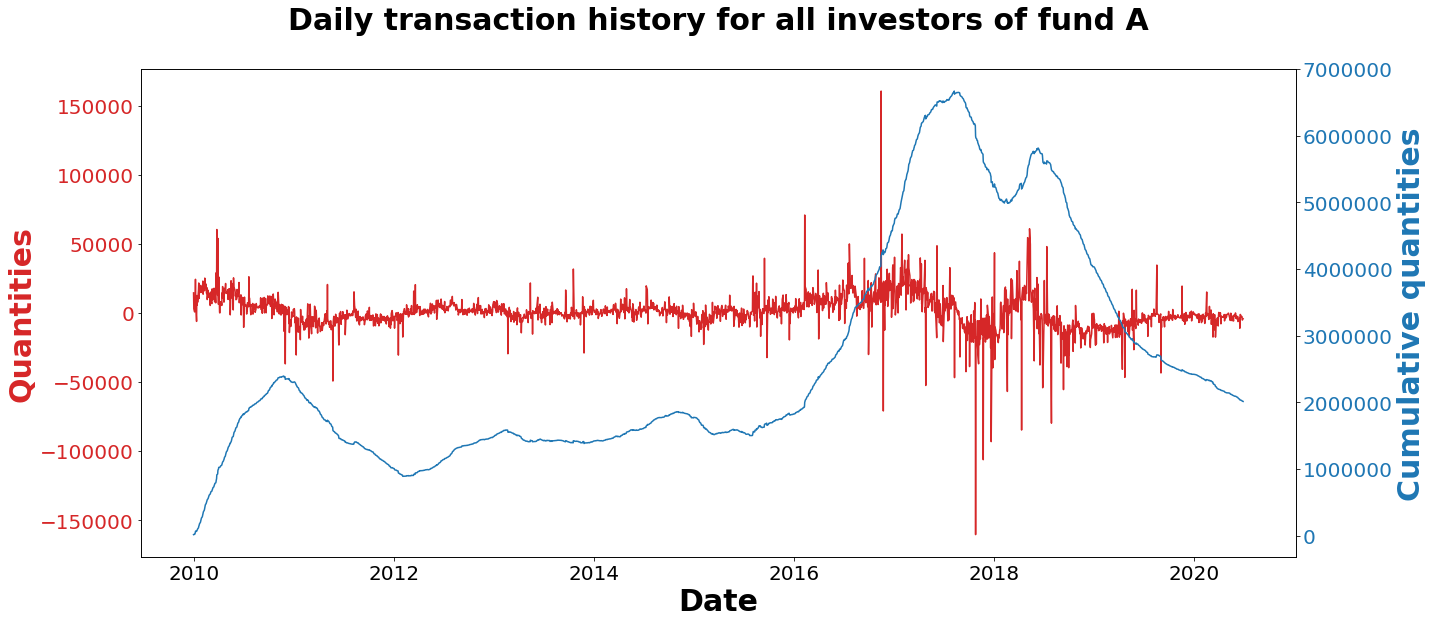

In [13]:
# Chart with all investors quantities by day vs date:

fig, ax1 = plt.subplots(figsize=(20,8))

color = 'tab:red'
ax1.set_xlabel('Date', fontsize = 30, fontweight = 'bold')
ax1.set_ylabel('Quantities', color=color, fontsize = 30, fontweight = 'bold')
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)
ax1.plot(Fund_A_day['date'], Fund_A_day['qty'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Cumulative quantities', color=color, fontsize = 30, fontweight = 'bold')  # we already handled the x-label with ax1
ax2.xaxis.set_tick_params(labelsize=20)
ax2.yaxis.set_tick_params(labelsize=20)
ax2.plot(Fund_A_day['date'], Fund_A_day['cum qty'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.title('Daily transaction history for all investors of fund A\n', fontsize=30, fontweight = 'bold')

plt.show()

### Monthly trend

In [14]:
Fund_A.head()

,investid,date,transaction,curr,qty,amtsharecurr,code,isfund,rdeur,sbeur,type,subtype,cntry
0,IB1,2009-12-31,NRD,EUR,-90.0,-134292.60,FR0010149120,0,-134292.60,0.0,Proprietary Desk,Proprietary Desk/Bank,France
1,IB1,2009-12-31,NSB,EUR,90.0,134292.60,FR0010149120,0,0.00,134292.6,Proprietary Desk,Proprietary Desk/Bank,France
2,IB1,2010-06-15,NRD,EUR,-33.0,-49804.92,FR0010149120,0,-49804.92,0.0,Proprietary Desk,Proprietary Desk/Bank,France
3,IB1,2010-07-26,NRD,EUR,-130.5,-197961.98,FR0010149120,0,-197961.98,0.0,Proprietary Desk,Proprietary Desk/Bank,France
4,IB1,2010-12-14,NRD,EUR,-18.0,-27537.12,FR0010149120,0,-27537.12,0.0,Proprietary Desk,Proprietary Desk/Bank,France


In [15]:
Fund_A_month = Fund_A
Fund_A_month['month'] = Fund_A_month['date'].apply(lambda x: dt.date.strftime(x, "%Y-%m-01"))
Fund_A_month = Fund_A_month.groupby('month').sum()
Fund_A_month['date'] = Fund_A_month.index
Fund_A_month = Fund_A_month.reset_index(drop=True)
Fund_A_month = Fund_A_month.drop([0,126],axis=0).reset_index(drop=True)
Fund_A_month = Fund_A_month.drop('isfund',axis=1).reset_index(drop=True)
Fund_A_month.head()

C:\Users\Remi\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,qty,amtsharecurr,rdeur,sbeur,date
0,249849.26599,3.744354e+08,-1.246607e+08,4.990960e+08,2010-01-01
1,341857.16132,5.120535e+08,-1.414945e+08,6.535480e+08,2010-02-01
2,384462.94100,5.788104e+08,-2.125593e+08,7.913697e+08,2010-03-01
3,266257.42770,4.028632e+08,-1.726502e+08,5.755133e+08,2010-04-01
4,309213.06483,4.680768e+08,-2.161224e+08,6.841992e+08,2010-05-01


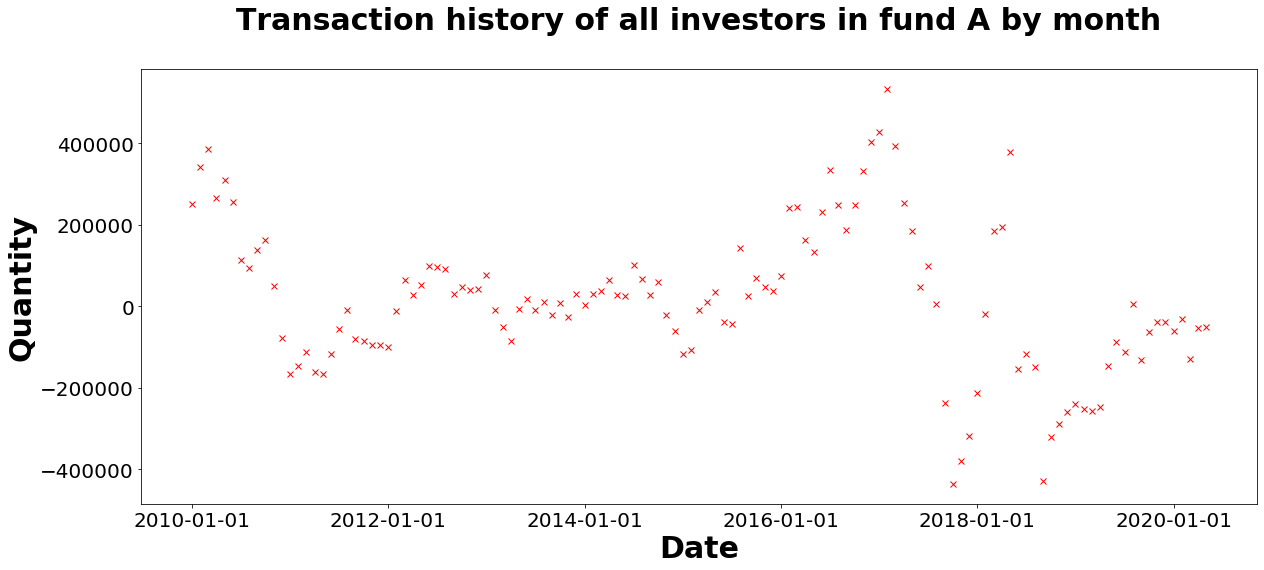

In [16]:
#Graphe IO1 quantity vs date:

fig, ax1 = plt.subplots(figsize=(20,8))

color = 'red'
ax1.set_xlabel('Date', fontsize = 30, fontweight = 'bold')
ax1.set_ylabel('Quantity', color='black', fontsize = 30, fontweight = 'bold')
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)
ax1.plot(Fund_A_month['date'], Fund_A_month['qty'], color=color, ls='', marker='x')
ax1.tick_params(axis='y', labelcolor='black')
plt.xticks(['2010-01-01','2012-01-01', '2014-01-01', '2016-01-01', '2018-01-01', '2020-01-01' ])

plt.title('Transaction history of all investors in fund A by month\n', fontsize=30, fontweight = 'bold')

plt.show()

## Prediction of next month quantity

In [17]:
navs_A.head()

,date,isin,curr,price,aum,aumeur,benchmprice
0,2009-12-31,FR0010149120,EUR,1492.40,3.165076e+09,3.165076e+09,153.62
1,2010-01-04,FR0010149120,EUR,1492.84,3.171633e+09,3.171633e+09,153.56
2,2010-01-05,FR0010149120,EUR,1494.77,3.189584e+09,3.189584e+09,153.68
3,2010-01-06,FR0010149120,EUR,1495.60,3.206930e+09,3.206930e+09,153.71
4,2010-01-07,FR0010149120,EUR,1497.61,3.247781e+09,3.247781e+09,153.81


In [17]:
navs_A_month = navs_A
navs_A_month['month'] = navs_A_month['date'].apply(lambda x: dt.date.strftime(x, "%Y-%m-01"))
navs_A_month = navs_A_month.groupby('month').mean()
navs_A_month['date'] = navs_A_month.index
navs_A_month = navs_A_month.reset_index(drop=True)
navs_A_month = navs_A_month.drop([0,126],axis=0).reset_index(drop=True)
navs_A_month = navs_A_month.drop(['aum','aumeur'],axis=1)
navs_A_month = navs_A_month.loc[:,['date','price','benchmprice']]
navs_A_month.head()

C:\Users\Remi\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,price,benchmprice
0,2010-01-01,1498.689000,153.859000
1,2010-02-01,1498.074500,154.118000
2,2010-03-01,1505.220870,154.860870
3,2010-04-01,1512.720952,154.678571
4,2010-05-01,1513.730526,154.974737


In [20]:
CAC_40.head()

,Open,date
0,3952.530029,2009-12-31
1,3952.209961,2010-01-04
2,4012.429932,2010-01-05
3,4014.449951,2010-01-06
4,4005.959961,2010-01-07


In [21]:
CAC_40_month = CAC_40
CAC_40_month['month'] = CAC_40_month['date'].apply(lambda x: dt.date.strftime(x, "%Y-%m-01"))
CAC_40_month = CAC_40_month.groupby('month').mean()
CAC_40_month['date'] = CAC_40_month.index
CAC_40_month = CAC_40_month.reset_index(drop=True)
CAC_40_month = CAC_40_month.drop([0,126],axis=0).reset_index(drop=True)
CAC_40_month = CAC_40_month.rename(columns={"Open": "CAC40"})
CAC_40_month.head()

,CAC40,date
0,3937.549463,2010-01-01
1,3697.415479,2010-02-01
2,3912.442584,2010-03-01
3,3985.003479,2010-04-01
4,3574.881917,2010-05-01


In [22]:
df_9 = navs_A_month.merge(right=Fund_A_month,on='date').drop(['amtsharecurr','rdeur','sbeur'], axis=1)
df_9 = df_9.merge(right=CAC_40_month,on='date')
df_9.head()

,date,price,benchmprice,qty,CAC40
0,2010-01-01,1498.689000,153.859000,249849.26599,3937.549463
1,2010-02-01,1498.074500,154.118000,341857.16132,3697.415479
2,2010-03-01,1505.220870,154.860870,384462.94100,3912.442584
3,2010-04-01,1512.720952,154.678571,266257.42770,3985.003479
4,2010-05-01,1513.730526,154.974737,309213.06483,3574.881917


In [23]:
df_10 = df_9
df_10['ratio'] = df_10['price']/df_10['benchmprice']
df_10.head()

,date,price,benchmprice,qty,CAC40,ratio
0,2010-01-01,1498.689000,153.859000,249849.26599,3937.549463,9.740665
1,2010-02-01,1498.074500,154.118000,341857.16132,3697.415479,9.720308
2,2010-03-01,1505.220870,154.860870,384462.94100,3912.442584,9.719827
3,2010-04-01,1512.720952,154.678571,266257.42770,3985.003479,9.779771
4,2010-05-01,1513.730526,154.974737,309213.06483,3574.881917,9.767595


In [24]:
for i in range(1,len(df_10)):
    df_10.loc[i,'price -1'] = df_10.loc[i-1,'price']
    df_10.loc[i,'benchm -1'] = df_10.loc[i-1,'benchmprice']
    df_10.loc[i,'qty -1'] = df_10.loc[i-1,'qty']
    df_10.loc[i,'ratio -1'] = df_10.loc[i-1,'ratio']
    df_10.loc[i,'CAC40 -1'] = df_10.loc[i-1,'CAC40']
for i in range(2,len(df_10)):
    df_10.loc[i,'price -2'] = df_10.loc[i-2,'price']
    df_10.loc[i,'benchm -2'] = df_10.loc[i-2,'benchmprice']
    df_10.loc[i,'qty -2'] = df_10.loc[i-2,'qty']
    df_10.loc[i,'ratio -2'] = df_10.loc[i-2,'ratio']
    df_10.loc[i,'CAC40 -2'] = df_10.loc[i-2,'CAC40']
for i in range(3,len(df_10)):
    df_10.loc[i,'price -3'] = df_10.loc[i-3,'price']
    df_10.loc[i,'benchm -3'] = df_10.loc[i-3,'benchmprice']
    df_10.loc[i,'qty -3'] = df_10.loc[i-3,'qty']
    df_10.loc[i,'ratio -3'] = df_10.loc[i-3,'ratio']  
df_10 = df_10.drop([0,1,2], axis=0).reset_index(drop=True)
df_10.head()

,date,price,benchmprice,qty,CAC40,ratio,price -1,benchm -1,qty -1,ratio -1,CAC40 -1,price -2,benchm -2,qty -2,ratio -2,CAC40 -2,price -3,benchm -3,qty -3,ratio -3
0,2010-04-01,1512.720952,154.678571,266257.42770,3985.003479,9.779771,1505.220870,154.860870,384462.94100,9.719827,3912.442584,1498.074500,154.118000,341857.16132,9.720308,3697.415479,1498.689000,153.859000,249849.26599,9.740665
1,2010-05-01,1513.730526,154.974737,309213.06483,3574.881917,9.767595,1512.720952,154.678571,266257.42770,9.779771,3985.003479,1505.220870,154.860870,384462.94100,9.719827,3912.442584,1498.074500,154.118000,341857.16132,9.720308
2,2010-06-01,1512.190909,155.211364,255936.88579,3561.960471,9.742785,1513.730526,154.974737,309213.06483,9.767595,3574.881917,1512.720952,154.678571,266257.42770,9.779771,3985.003479,1505.220870,154.860870,384462.94100,9.719827
3,2010-07-01,1515.798095,155.228571,114275.98706,3536.414540,9.764943,1512.190909,155.211364,255936.88579,9.742785,3561.960471,1513.730526,154.974737,309213.06483,9.767595,3574.881917,1512.720952,154.678571,266257.42770,9.779771
4,2010-08-01,1532.939091,155.799545,93908.16473,3626.645452,9.839176,1515.798095,155.228571,114275.98706,9.764943,3536.414540,1512.190909,155.211364,255936.88579,9.742785,3561.960471,1513.730526,154.974737,309213.06483,9.767595


### Dummy case 1: predicted qty = previous month quantity

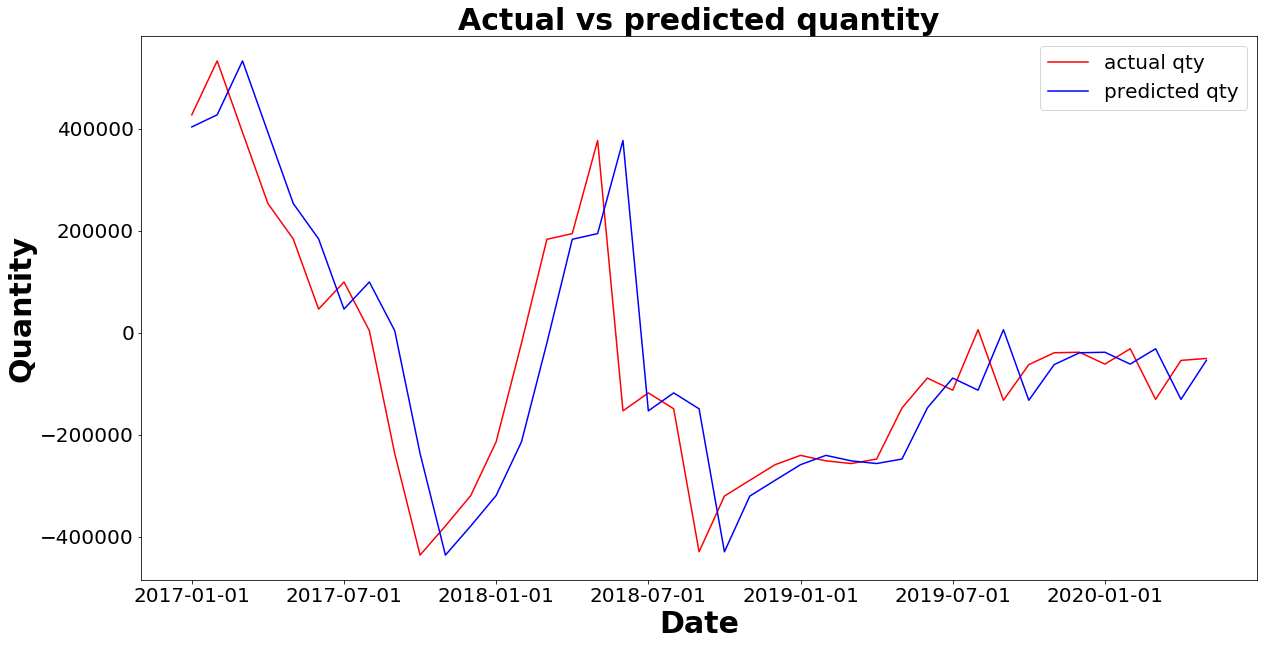

In [50]:
# Graphe montrant la comparaison entre la quantité réelle et la quantité prédite:
fig, ax1 = plt.subplots(figsize=(20,10))

color1 = 'red'
color2 = 'blue'
ax1.set_xlabel('Date', fontsize = 30, fontweight = 'bold')
ax1.set_ylabel('Quantity', color='black', fontsize = 30, fontweight = 'bold')
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)
ax1.plot(df10_2017['date'], df10_2017['qty'], color=color1, label='actual qty')
ax1.plot(df10_2017['date'], df10_2017['qty -1'], color=color2, label ='predicted qty')

plt.title('Actual vs predicted quantity', fontsize=30, fontweight = 'bold')
ax1.legend(fontsize=20)
plt.xticks(['2017-01-01','2017-07-01', '2018-01-01', '2018-07-01', '2019-01-01', '2019-07-01', '2020-01-01'])

plt.show()

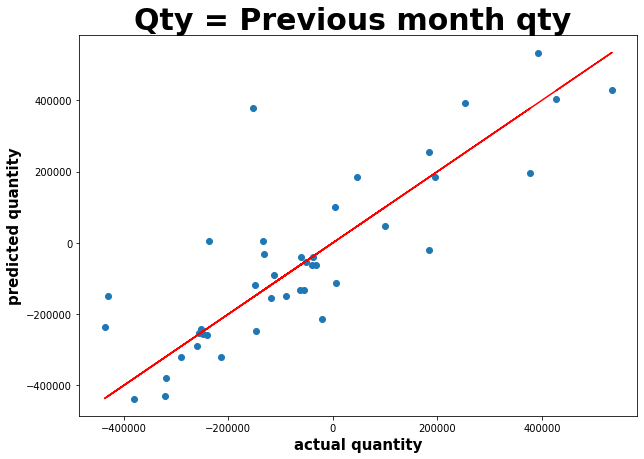

In [53]:
# Visualisation de l'erreur sur une prédiction au mois suivant:
plt.subplots(figsize=(10,7))
plt.scatter(x = 'qty', y= 'qty -1', data=df10_2017);
plt.plot(df10_2017['qty'], df10_2017['qty'],color='red');
plt.xlabel('actual quantity', fontsize = 15, fontweight = 'bold')
plt.ylabel('predicted quantity', color='black', fontsize = 15, fontweight = 'bold')
plt.title('Qty = Previous month qty ', color='black', fontsize = 30, fontweight = 'bold');

In [52]:
# Calcul du R2 score sur la prédiode janvier 2017 - mai 2020:

Moyenne = df10_2017['qty'].mean()
num = 0
denum = 0
for i in range(len(df10_2017)):
    num += (df10_2017.loc[i,'qty'] - df10_2017.loc[i,'qty -1'])**2
    denum += (df10_2017.loc[i,'qty'] - Moyenne)**2
R2 = 1 - (num/denum)
print(f"R2 score: {round(R2,2)}")

R2 score: 0.65


### Dummy case 2: predicted qty = linear extrapolation of last 3 months quantities

In [70]:
df_11 = df_9.loc[:,['date','qty']]
df_11.head()

,date,qty
0,2010-01-01,249849.26599
1,2010-02-01,341857.16132
2,2010-03-01,384462.94100
3,2010-04-01,266257.42770
4,2010-05-01,309213.06483


In [72]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
for i in range(3, len(df_11)):
    X_train = np.arange(i-3,i).reshape(-1, 1)
    y_train = np.array(df_11.iloc[i-3:i,1]).reshape(-1, 1)
    X_test = np.array(i).reshape(-1, 1)
    y_test = np.array(df_11.iloc[i,1]).reshape(-1, 1)
    regressor.fit(X_train, y_train)
    df_11.loc[i,'pred'] = regressor.predict(X_test)[0][0]

In [74]:
df_11 = df_11.drop([0,1,2], axis=0).reset_index(drop=True)
df_11.head()

,date,qty,pred
0,2010-04-01,266257.42770,460003.464447
1,2010-05-01,309213.06483,255259.443053
2,2010-06-01,255936.88579,244727.935007
3,2010-07-01,114275.98706,266815.250863
4,2010-08-01,93908.16473,31538.234790


In [75]:
df11_2017=df_11[df_11['date'] >= '2017-01-01'].reset_index(drop=True)
df11_2017.head()

,date,qty,pred
0,2017-01-01,427815.80159,484063.744797
1,2017-02-01,533666.22824,483770.109293
2,2017-03-01,393403.47342,584787.833583
3,2017-04-01,253764.66408,417216.172913
4,2017-05-01,184162.12741,113709.891087


In [77]:
# Calcul du R2 score sur la prédiode janvier 2017 - mai 2020:

Moyenne = df11_2017['qty'].mean()
num = 0
denum = 0
for i in range(len(df11_2017)):
    num += (df11_2017.loc[i,'qty'] - df11_2017.loc[i,'pred'])**2
    denum += (df11_2017.loc[i,'qty'] - Moyenne)**2
R2 = 1 - (num/denum)
print(f"R2 score: {round(R2,2)}")

R2 score: 0.51


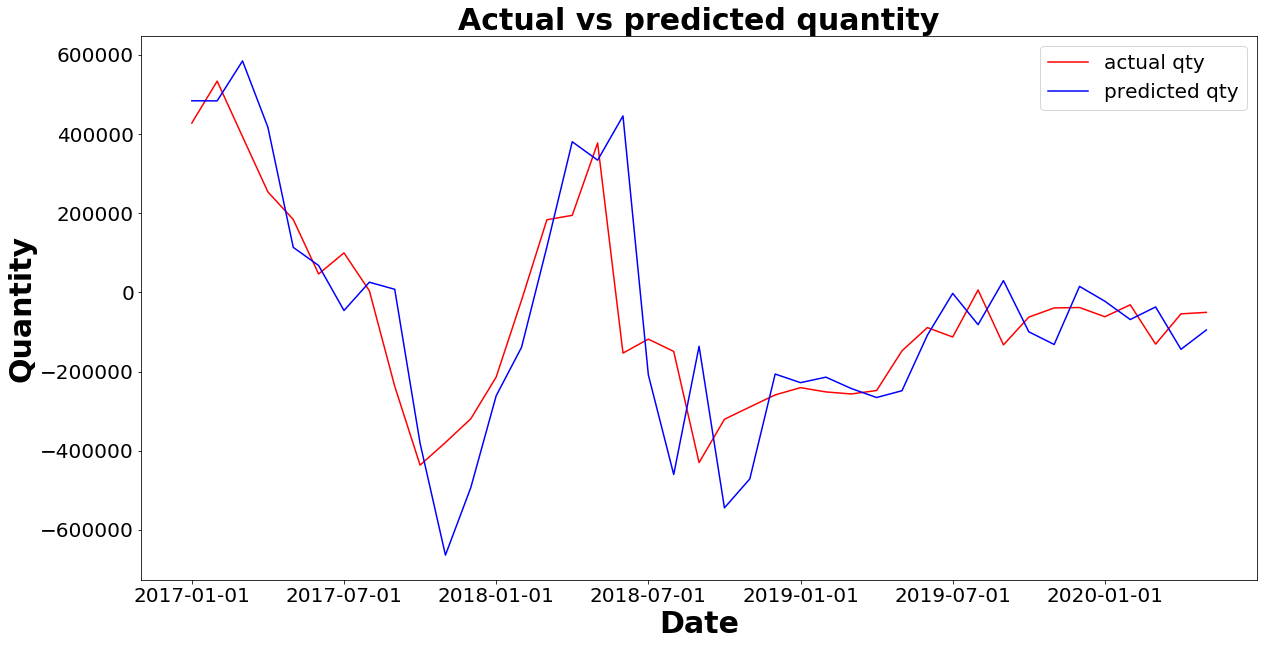

In [79]:
# Graphe montrant la comparaison entre la quantité réelle et la quantité prédite:
fig, ax1 = plt.subplots(figsize=(20,10))

color1 = 'red'
color2 = 'blue'
ax1.set_xlabel('Date', fontsize = 30, fontweight = 'bold')
ax1.set_ylabel('Quantity', color='black', fontsize = 30, fontweight = 'bold')
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)
ax1.plot(df11_2017['date'], df11_2017['qty'], color=color1, label='actual qty')
ax1.plot(df11_2017['date'], df11_2017['pred'], color=color2, label ='predicted qty')

plt.title('Actual vs predicted quantity', fontsize=30, fontweight = 'bold')
ax1.legend(fontsize=20)
plt.xticks(['2017-01-01','2017-07-01', '2018-01-01', '2018-07-01', '2019-01-01', '2019-07-01', '2020-01-01'])

plt.show()

### Case 3: linear regression

In [87]:
#Définition des variables explicatives et cibles:
X_10 = df_10.drop(['date','price','benchmprice','qty','ratio'], axis = 1)
y_10 = df_10.loc[:,['qty']]
X_10.head()

,price -1,benchm -1,qty -1,ratio -1,price -2,benchm -2,qty -2,ratio -2,price -3,benchm -3,qty -3,ratio -3,pred
0,1505.220870,154.860870,384462.94100,9.719827,1498.074500,154.118000,341857.16132,9.720308,1498.689000,153.859000,249849.26599,9.740665,NaN
1,1512.720952,154.678571,266257.42770,9.779771,1505.220870,154.860870,384462.94100,9.719827,1498.074500,154.118000,341857.16132,9.720308,NaN
2,1513.730526,154.974737,309213.06483,9.767595,1512.720952,154.678571,266257.42770,9.779771,1505.220870,154.860870,384462.94100,9.719827,NaN
3,1512.190909,155.211364,255936.88579,9.742785,1513.730526,154.974737,309213.06483,9.767595,1512.720952,154.678571,266257.42770,9.779771,NaN
4,1515.798095,155.228571,114275.98706,9.764943,1512.190909,155.211364,255936.88579,9.742785,1513.730526,154.974737,309213.06483,9.767595,NaN


In [43]:
# Making predictions from January 2017 until May 2020. Model is trained iteratively on available history on ith month

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
for i in range(df_10[df_10['date']=='2017-01-01'].index[0], len(df_10)):
    X_train = X_10.iloc[:i,:]
    y_train = y_10.iloc[:i,:]
    X_test = X_10.iloc[i,:]
    y_test = y_10.iloc[i,:]
    X_test = pd.DataFrame(data=np.array(X_test).reshape(1, -1),index={len(X_train)},columns=X_train.columns)
    X_train = pd.DataFrame(sc_x.fit_transform(X_train), columns = X_train.columns, index= X_train.index)
    X_test = pd.DataFrame(sc_x.transform(X_test), columns = X_test.columns, index=X_test.index)
    regressor.fit(X_train, y_train)
    df_10.loc[i,'pred'] = regressor.predict(X_test)[0][0]

In [44]:
df10_2017=df_10[df_10['date'] >= '2017-01-01'].reset_index(drop=True)
df10_2017.head()

,date,price,benchmprice,qty,ratio,price -1,benchm -1,qty -1,ratio -1,price -2,benchm -2,qty -2,ratio -2,price -3,benchm -3,qty -3,ratio -3,pred
0,2017-01-01,1752.710000,169.722905,427815.80159,10.326891,1751.775714,169.894914,404058.60690,10.310937,1751.120500,169.580585,332005.74269,10.326185,1749.531905,169.899286,248024.46795,10.297465,422269.622560
1,2017-02-01,1754.786500,169.616745,533666.22824,10.345597,1752.710000,169.722905,427815.80159,10.326891,1751.775714,169.894914,404058.60690,10.310937,1751.120500,169.580585,332005.74269,10.326185,429001.073175
2,2017-03-01,1755.212609,169.503039,393403.47342,10.355051,1754.786500,169.616745,533666.22824,10.345597,1752.710000,169.722905,427815.80159,10.326891,1751.775714,169.894914,404058.60690,10.310937,540921.915819
3,2017-04-01,1756.560556,169.544750,253764.66408,10.360454,1755.212609,169.503039,393403.47342,10.355051,1754.786500,169.616745,533666.22824,10.345597,1752.710000,169.722905,427815.80159,10.326891,404313.802470
4,2017-05-01,1756.204000,169.585135,184162.12741,10.355884,1756.560556,169.544750,253764.66408,10.360454,1755.212609,169.503039,393403.47342,10.355051,1754.786500,169.616745,533666.22824,10.345597,300818.927802


In [45]:
df10_2017.loc[:,['date','qty','pred']]

,date,qty,pred
0,2017-01-01,427815.80159,422269.622560
1,2017-02-01,533666.22824,429001.073175
2,2017-03-01,393403.47342,540921.915819
3,2017-04-01,253764.66408,404313.802470
4,2017-05-01,184162.12741,300818.927802
5,2017-06-01,46433.67468,236702.584465
6,2017-07-01,99734.71815,87192.451598
7,2017-08-01,4124.76489,136911.597266
8,2017-09-01,-237083.43124,70696.639938
9,2017-10-01,-436486.12427,-232991.872584


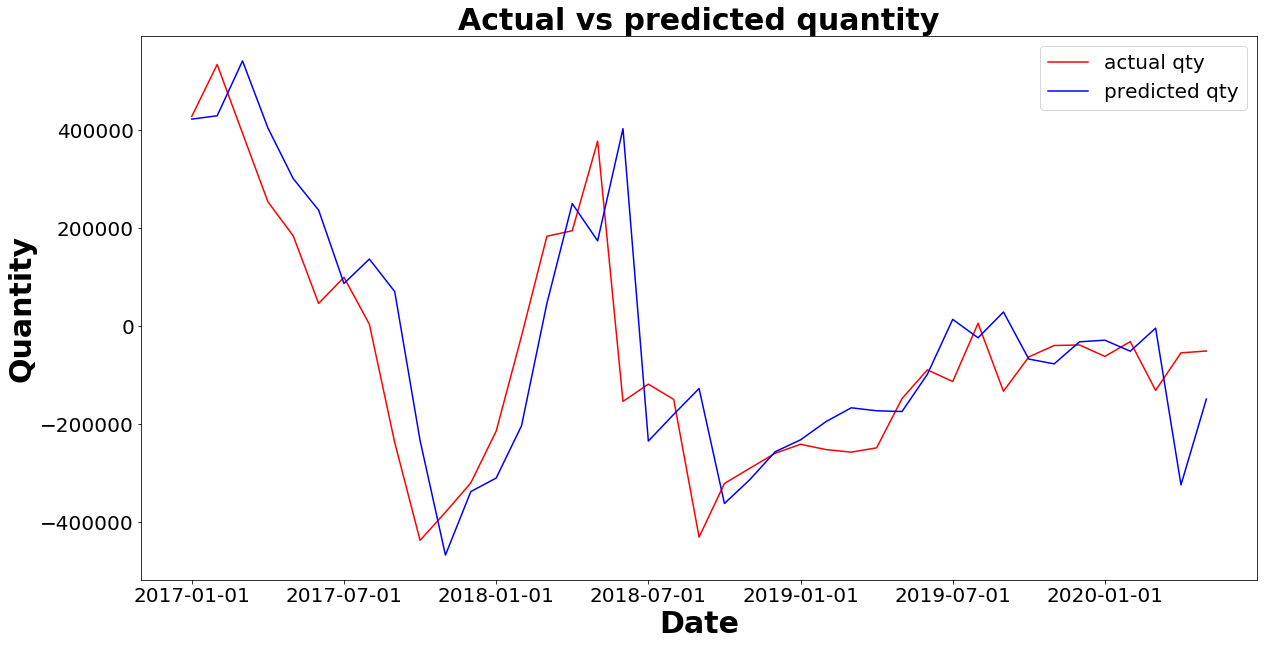

In [47]:
# Graphe montrant la comparaison entre la quantité réelle et la quantité prédite:
fig, ax1 = plt.subplots(figsize=(20,10))

color1 = 'red'
color2 = 'blue'
ax1.set_xlabel('Date', fontsize = 30, fontweight = 'bold')
ax1.set_ylabel('Quantity', color='black', fontsize = 30, fontweight = 'bold')
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)
ax1.plot(df10_2017['date'], df10_2017['qty'], color=color1, label='actual qty')
ax1.plot(df10_2017['date'], df10_2017['pred'], color=color2, label ='predicted qty')

plt.title('Actual vs predicted quantity', fontsize=30, fontweight = 'bold')
ax1.legend(fontsize=20)
plt.xticks(['2017-01-01','2017-07-01', '2018-01-01', '2018-07-01', '2019-01-01', '2019-07-01', '2020-01-01'])

plt.show()

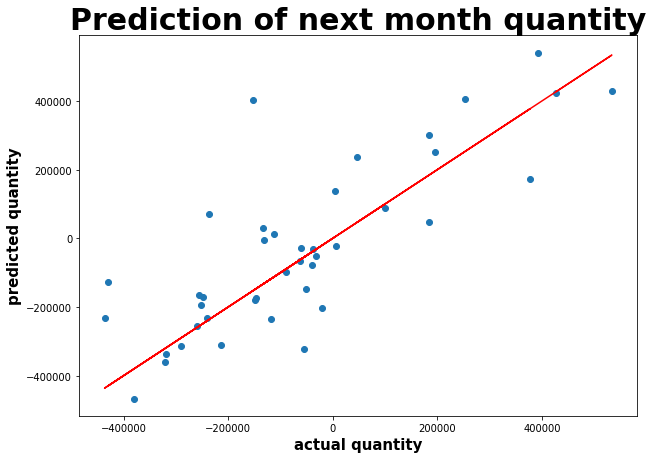

In [48]:
# Visualisation de l'erreur sur une prédiction au mois suivant:
plt.subplots(figsize=(10,7))
plt.scatter(x = 'qty', y= 'pred', data=df10_2017);
plt.plot(df10_2017['qty'], df10_2017['qty'],color='red');
plt.xlabel('actual quantity', fontsize = 15, fontweight = 'bold')
plt.ylabel('predicted quantity', color='black', fontsize = 15, fontweight = 'bold')
plt.title('Prediction of next month quantity', color='black', fontsize = 30, fontweight = 'bold');

In [49]:
# Calcul du R2 score sur la prédiode janvier 2017 - mai 2020:

Moyenne = df10_2017['qty'].mean()
num = 0
denum = 0
for i in range(len(df10_2017)):
    num += (df10_2017.loc[i,'qty'] - df10_2017.loc[i,'pred'])**2
    denum += (df10_2017.loc[i,'qty'] - Moyenne)**2
R2 = 1 - (num/denum)
print(f"R2 score: {round(R2,2)}")

R2 score: 0.56


In [54]:
# Feature ranking:
from sklearn.feature_selection import f_regression
feature_importance = f_regression(X_10, y_10)
feature_ranking = pd.DataFrame(columns=X_10.columns, data=feature_importance, index=["f-score", "p-value"]).transpose().sort_values(["f-score", "p-value"], ascending=False)
feature_ranking

C:\Users\Remi\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,f-score,p-value
qty -1,332.810530,2.103361e-36
qty -2,129.868275,7.736170e-21
qty -3,59.800443,3.606132e-12
ratio -3,0.939649,3.343178e-01
ratio -2,0.298138,5.860660e-01
benchm -1,0.174316,6.770500e-01
benchm -2,0.113203,7.371147e-01
price -1,0.090043,7.646418e-01
benchm -3,0.058555,8.092084e-01
price -3,0.023053,8.795748e-01


### Case 4

In [25]:
df_12 = df_10
df_12['ratio growth'] = df_12['ratio']/df_12['ratio -1'] - 1
df_12['ratio growth -1'] = df_12['ratio -1']/df_12['ratio -2'] - 1
df_12['ratio growth -2'] = df_12['ratio -2']/df_12['ratio -3'] - 1
df_12['CAC40 growth'] = df_12['CAC40']/df_12['CAC40 -1'] - 1
df_12['CAC40 growth -1'] = df_12['CAC40 -1']/df_12['CAC40 -2'] - 1
df_12.head()

,date,price,benchmprice,qty,CAC40,ratio,price -1,benchm -1,qty -1,ratio -1,...,CAC40 -2,price -3,benchm -3,qty -3,ratio -3,ratio growth,ratio growth -1,ratio growth -2,CAC40 growth,CAC40 growth -1
0,2010-04-01,1512.720952,154.678571,266257.42770,3985.003479,9.779771,1505.220870,154.860870,384462.94100,9.719827,...,3697.415479,1498.689000,153.859000,249849.26599,9.740665,0.006167,-0.000050,-0.002090,0.018546,0.058156
1,2010-05-01,1513.730526,154.974737,309213.06483,3574.881917,9.767595,1512.720952,154.678571,266257.42770,9.779771,...,3912.442584,1498.074500,154.118000,341857.16132,9.720308,-0.001245,0.006167,-0.000050,-0.102916,0.018546
2,2010-06-01,1512.190909,155.211364,255936.88579,3561.960471,9.742785,1513.730526,154.974737,309213.06483,9.767595,...,3985.003479,1505.220870,154.860870,384462.94100,9.719827,-0.002540,-0.001245,0.006167,-0.003615,-0.102916
3,2010-07-01,1515.798095,155.228571,114275.98706,3536.414540,9.764943,1512.190909,155.211364,255936.88579,9.742785,...,3574.881917,1512.720952,154.678571,266257.42770,9.779771,0.002274,-0.002540,-0.001245,-0.007172,-0.003615
4,2010-08-01,1532.939091,155.799545,93908.16473,3626.645452,9.839176,1515.798095,155.228571,114275.98706,9.764943,...,3561.960471,1513.730526,154.974737,309213.06483,9.767595,0.007602,0.002274,-0.002540,0.025515,-0.007172


In [26]:
# Correlations between target variable quantity and features:
corr = df_12.corr().loc[:,['qty']].drop('qty', axis=0)
corr['abs']=corr['qty'].apply(lambda x: np.abs(x))
corr = corr.sort_values('abs',ascending=False)
corr = corr.drop('abs', axis=1)
corr

,qty
qty -1,0.857315
qty -2,0.720935
qty -3,0.576709
CAC40 -2,-0.217839
CAC40 -1,-0.207795
CAC40,-0.191867
ratio growth -1,0.161575
ratio growth -2,0.141481
ratio growth,0.121722
ratio -3,-0.088145


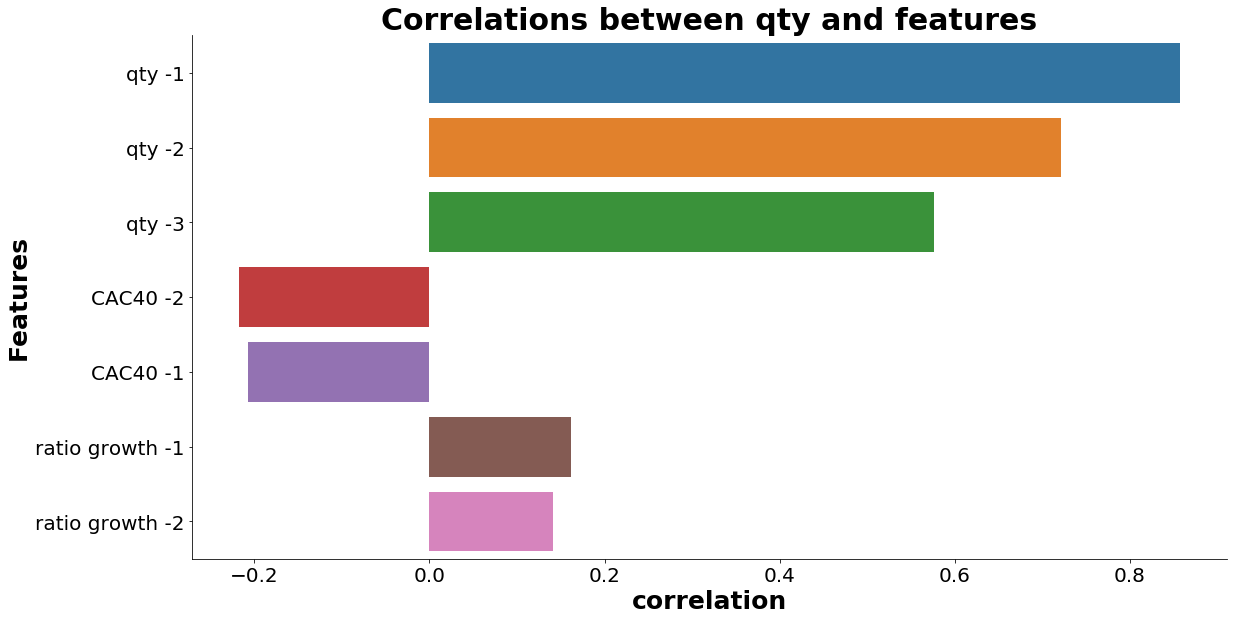

In [82]:
# Graphe pour le feature ranking
sns.catplot(x=[value for value in corr['qty'].values], y=[index for index in corr.index], data=corr, kind="bar", legend=False, height=8, aspect=2)
plt.xlabel('correlation', fontsize=25, fontweight= 'bold')
plt.ylabel('Features', fontsize=25, fontweight= 'bold')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title('Correlations between qty and features', fontsize=30, fontweight= 'bold')
plt.show();

In [52]:
df_12.loc[:,['date','qty -1','qty -2','qty -3','ratio growth -1','ratio growth -2', 'CAC40 -1', 'CAC40 -2','qty']].head()

,date,qty -1,qty -2,qty -3,ratio growth -1,ratio growth -2,CAC40 -1,CAC40 -2,qty
0,2010-04-01,384462.94100,341857.16132,249849.26599,-0.000050,-0.002090,3912.442584,3697.415479,266257.42770
1,2010-05-01,266257.42770,384462.94100,341857.16132,0.006167,-0.000050,3985.003479,3912.442584,309213.06483
2,2010-06-01,309213.06483,266257.42770,384462.94100,-0.001245,0.006167,3574.881917,3985.003479,255936.88579
3,2010-07-01,255936.88579,309213.06483,266257.42770,-0.002540,-0.001245,3561.960471,3574.881917,114275.98706
4,2010-08-01,114275.98706,255936.88579,309213.06483,0.002274,-0.002540,3536.414540,3561.960471,93908.16473


In [109]:
#Définition des variables explicatives et cibles:
X_12 = df_12.loc[:,['qty -1','qty -2','qty -3','ratio growth -1','ratio growth -2', 'CAC40 -1', 'CAC40 -2']]
y_12 = df_12.loc[:,['qty']]
X_12.head()

,qty -1,qty -2,qty -3,ratio growth -1,ratio growth -2,CAC40 -1,CAC40 -2
0,384462.94100,341857.16132,249849.26599,-0.000050,-0.002090,3912.442584,3697.415479
1,266257.42770,384462.94100,341857.16132,0.006167,-0.000050,3985.003479,3912.442584
2,309213.06483,266257.42770,384462.94100,-0.001245,0.006167,3574.881917,3985.003479
3,255936.88579,309213.06483,266257.42770,-0.002540,-0.001245,3561.960471,3574.881917
4,114275.98706,255936.88579,309213.06483,0.002274,-0.002540,3536.414540,3561.960471


In [110]:
# Making predictions from January 2017 until May 2020. Model is trained iteratively on available history on ith month

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
for i in range(df_12[df_12['date']=='2017-01-01'].index[0], len(df_12)):
    X_train = X_12.iloc[:i,:]
    y_train = y_12.iloc[:i,:]
    X_test = X_12.iloc[i,:]
    y_test = y_12.iloc[i,:]
    X_test = pd.DataFrame(data=np.array(X_test).reshape(1, -1),index={len(X_train)},columns=X_train.columns)
    X_train = pd.DataFrame(sc_x.fit_transform(X_train), columns = X_train.columns, index= X_train.index)
    X_test = pd.DataFrame(sc_x.transform(X_test), columns = X_test.columns, index=X_test.index)
    regressor.fit(X_train, y_train)
    df_12.loc[i,'pred'] = regressor.predict(X_test)[0][0]

In [111]:
df12_2017=df_12[df_12['date'] >= '2017-01-01'].reset_index(drop=True)
df12_2017.head()

,date,price,benchmprice,qty,CAC40,ratio,price -1,benchm -1,qty -1,ratio -1,...,ratio -2,CAC40 -2,price -3,benchm -3,qty -3,ratio -3,ratio growth -1,ratio growth -2,CAC40 growth -1,pred
0,2017-01-01,1752.710000,169.722905,427815.80159,4868.038641,10.326891,1751.775714,169.894914,404058.60690,10.310937,...,10.326185,4505.217707,1749.531905,169.899286,248024.46795,10.297465,-0.001477,0.002789,0.053710,353632.609733
1,2017-02-01,1754.786500,169.616745,533666.22824,4850.731494,10.345597,1752.710000,169.722905,427815.80159,10.326891,...,10.310937,4747.191476,1751.120500,169.580585,332005.74269,10.326185,0.001547,-0.001477,0.025457,394855.045065
2,2017-03-01,1755.212609,169.503039,393403.47342,4996.883874,10.355051,1754.786500,169.616745,533666.22824,10.345597,...,10.326891,4868.038641,1751.775714,169.894914,404058.60690,10.310937,0.001811,0.001547,-0.003555,523689.024997
3,2017-04-01,1756.560556,169.544750,253764.66408,5132.827230,10.360454,1755.212609,169.503039,393403.47342,10.355051,...,10.345597,4850.731494,1752.710000,169.722905,427815.80159,10.326891,0.000914,0.001811,0.030130,353786.851140
4,2017-05-01,1756.204000,169.585135,184162.12741,5349.059570,10.355884,1756.560556,169.544750,253764.66408,10.360454,...,10.355051,4996.883874,1754.786500,169.616745,533666.22824,10.345597,0.000522,0.000914,0.027206,260012.670194


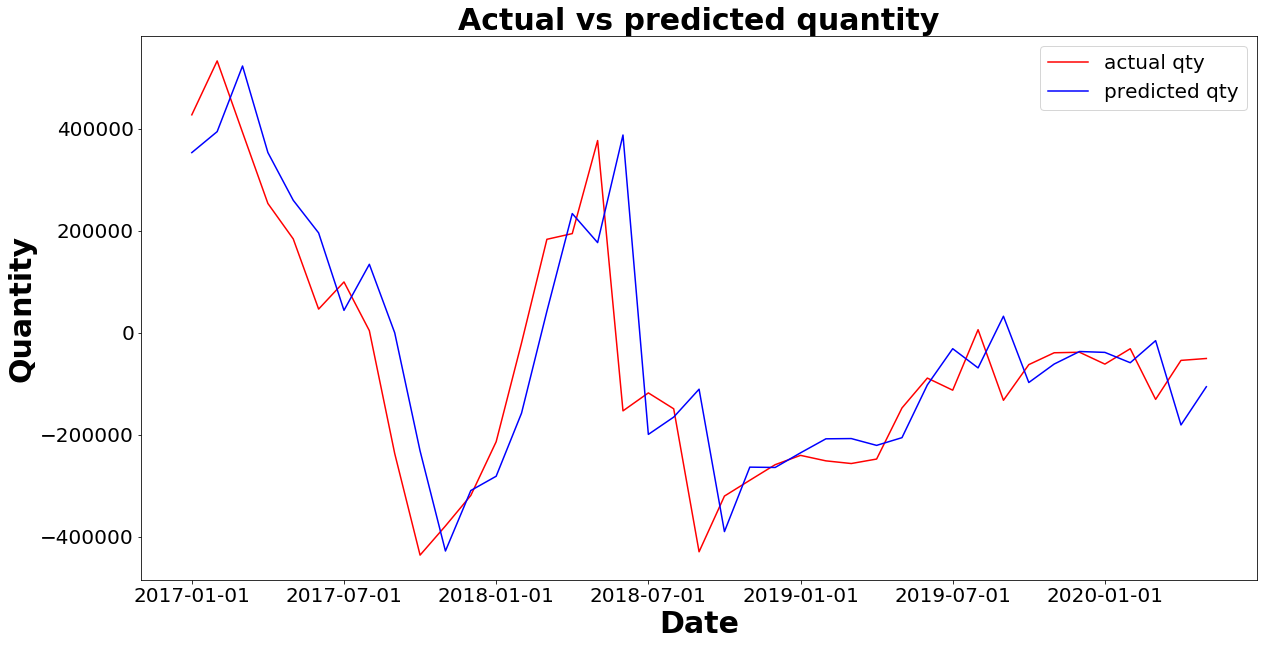

In [112]:
# Graphe montrant la comparaison entre la quantité réelle et la quantité prédite:
fig, ax1 = plt.subplots(figsize=(20,10))

color1 = 'red'
color2 = 'blue'
ax1.set_xlabel('Date', fontsize = 30, fontweight = 'bold')
ax1.set_ylabel('Quantity', color='black', fontsize = 30, fontweight = 'bold')
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)
ax1.plot(df12_2017['date'], df12_2017['qty'], color=color1, label='actual qty')
ax1.plot(df12_2017['date'], df12_2017['pred'], color=color2, label ='predicted qty')

plt.title('Actual vs predicted quantity', fontsize=30, fontweight = 'bold')
ax1.legend(fontsize=20)
plt.xticks(['2017-01-01','2017-07-01', '2018-01-01', '2018-07-01', '2019-01-01', '2019-07-01', '2020-01-01'])

plt.show()

In [113]:
# Calcul du R2 score sur la prédiode janvier 2017 - mai 2020:

Moyenne = df12_2017['qty'].mean()
num = 0
denum = 0
for i in range(len(df12_2017)):
    num += (df12_2017.loc[i,'qty'] - df12_2017.loc[i,'pred'])**2
    denum += (df12_2017.loc[i,'qty'] - Moyenne)**2
R2 = 1 - (num/denum)
print(f"R2 score: {round(R2,2)}")

R2 score: 0.64


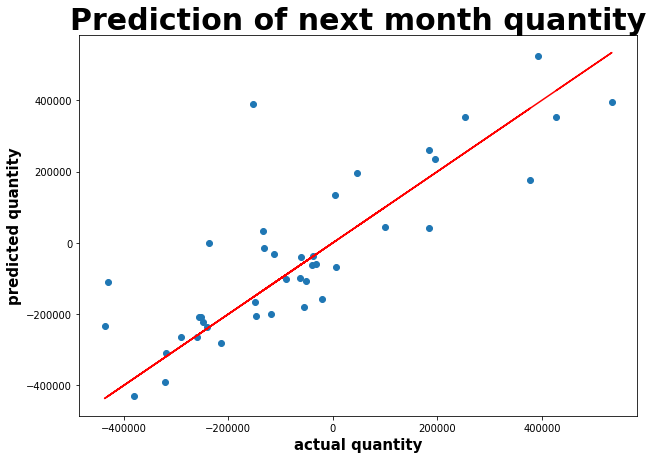

In [114]:
# Visualisation de l'erreur sur une prédiction au mois suivant:
plt.subplots(figsize=(10,7))
plt.scatter(x = 'qty', y= 'pred', data=df12_2017);
plt.plot(df12_2017['qty'], df12_2017['qty'],color='red');
plt.xlabel('actual quantity', fontsize = 15, fontweight = 'bold')
plt.ylabel('predicted quantity', color='black', fontsize = 15, fontweight = 'bold')
plt.title('Prediction of next month quantity', color='black', fontsize = 30, fontweight = 'bold');

In [48]:
# Feature ranking:
from sklearn.feature_selection import f_regression
feature_importance = f_regression(X_12, y_12)
feature_ranking = pd.DataFrame(columns=X_12.columns, data=feature_importance, index=["f-score", "p-value"]).transpose().sort_values(["f-score", "p-value"], ascending=False)
feature_ranking

C:\Users\Remi\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,f-score,p-value
qty -1,332.810530,2.103361e-36
qty -2,129.868275,7.736170e-21
qty -3,59.800443,3.606132e-12
CAC40 -2,5.978168,1.593651e-02
CAC40 -1,5.415254,2.163775e-02
ratio growth -1,3.216767,7.540599e-02
ratio growth -2,2.451072,1.200780e-01


### Case 5: More variables

In [129]:
df_12.head()

,date,price,benchmprice,qty,CAC40,ratio,price -1,benchm -1,qty -1,ratio -1,...,ratio -2,CAC40 -2,price -3,benchm -3,qty -3,ratio -3,ratio growth -1,ratio growth -2,CAC40 growth -1,pred
0,2010-04-01,1512.720952,154.678571,266257.42770,3985.003479,9.779771,1505.220870,154.860870,384462.94100,9.719827,...,9.720308,3697.415479,1498.689000,153.859000,249849.26599,9.740665,-0.000050,-0.002090,0.058156,NaN
1,2010-05-01,1513.730526,154.974737,309213.06483,3574.881917,9.767595,1512.720952,154.678571,266257.42770,9.779771,...,9.719827,3912.442584,1498.074500,154.118000,341857.16132,9.720308,0.006167,-0.000050,0.018546,NaN
2,2010-06-01,1512.190909,155.211364,255936.88579,3561.960471,9.742785,1513.730526,154.974737,309213.06483,9.767595,...,9.779771,3985.003479,1505.220870,154.860870,384462.94100,9.719827,-0.001245,0.006167,-0.102916,NaN
3,2010-07-01,1515.798095,155.228571,114275.98706,3536.414540,9.764943,1512.190909,155.211364,255936.88579,9.742785,...,9.767595,3574.881917,1512.720952,154.678571,266257.42770,9.779771,-0.002540,-0.001245,-0.003615,NaN
4,2010-08-01,1532.939091,155.799545,93908.16473,3626.645452,9.839176,1515.798095,155.228571,114275.98706,9.764943,...,9.742785,3561.960471,1513.730526,154.974737,309213.06483,9.767595,0.002274,-0.002540,-0.007172,NaN


In [27]:
Gold = web.DataReader('GC=F', data_source='yahoo', start='2010-01-01', end='2020-05-31')
Gold = Gold.loc[:,['Open']]
Gold = Gold.rename(columns={"Open": "Gold"})
Gold['month'] = Gold.index
Gold['month'] = Gold['month'].apply(lambda x: dt.date.strftime(x, "%Y-%m-01"))
Gold = Gold.groupby('month').mean()
Gold['date'] = Gold.index
Gold = Gold.reset_index(drop=True)
Gold.head()

,Gold,date
0,1117.578941,2010-01-01
1,1098.900012,2010-02-01
2,1114.204346,2010-03-01
3,1150.528576,2010-04-01
4,1204.255011,2010-05-01


In [28]:
for i in range(1,len(Gold)):
    Gold.loc[i,'Gold -1'] = Gold.loc[i-1,'Gold']
for i in range(2,len(Gold)):
    Gold.loc[i,'Gold -2'] = Gold.loc[i-2,'Gold']
for i in range(3,len(Gold)):
    Gold.loc[i,'Gold -3'] = Gold.loc[i-3,'Gold']
Gold['Gold growth'] = Gold['Gold']/Gold['Gold -1'] - 1
Gold['Gold growth -1'] = Gold['Gold -1']/Gold['Gold -2'] - 1
Gold['Gold growth -2'] = Gold['Gold -2']/Gold['Gold -3'] - 1
Gold.head()

,Gold,date,Gold -1,Gold -2,Gold -3,Gold growth,Gold growth -1,Gold growth -2
0,1117.578941,2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1,1098.900012,2010-02-01,1117.578941,NaN,NaN,-0.016714,NaN,NaN
2,1114.204346,2010-03-01,1098.900012,1117.578941,NaN,0.013927,-0.016714,NaN
3,1150.528576,2010-04-01,1114.204346,1098.900012,1117.578941,0.032601,0.013927,-0.016714
4,1204.255011,2010-05-01,1150.528576,1114.204346,1098.900012,0.046697,0.032601,0.013927


In [29]:
EUR3M = pd.read_csv('Datasets/Euribor.csv', sep=';')
EUR3M['date'] = EUR3M['date'].apply(lambda x: dt.datetime.strptime(x, "%d/%m/%Y"))

In [30]:
for i in range(1,len(EUR3M)):
    EUR3M.loc[i,'EUR3M -1'] = EUR3M.loc[i-1,'EUR3M']
for i in range(2,len(EUR3M)):
    EUR3M.loc[i,'EUR3M -2'] = EUR3M.loc[i-2,'EUR3M']
for i in range(3,len(EUR3M)):
    EUR3M.loc[i,'EUR3M -3'] = EUR3M.loc[i-3,'EUR3M']
EUR3M['EUR3M growth'] = EUR3M['EUR3M']/EUR3M['EUR3M -1'] - 1
EUR3M['EUR3M growth -1'] = EUR3M['EUR3M -1']/EUR3M['EUR3M -2'] - 1
EUR3M['EUR3M growth -2'] = EUR3M['EUR3M -2']/EUR3M['EUR3M -3'] - 1
EUR3M.head()

,date,EUR3M,EUR3M -1,EUR3M -2,EUR3M -3,EUR3M growth,EUR3M growth -1,EUR3M growth -2
0,2010-01-01,0.680,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-02-01,0.662,0.680,NaN,NaN,-0.026471,NaN,NaN
2,2010-03-01,0.645,0.662,0.680,NaN,-0.025680,-0.026471,NaN
3,2010-04-01,0.645,0.645,0.662,0.680,0.000000,-0.025680,-0.026471
4,2010-05-01,0.687,0.645,0.645,0.662,0.065116,0.000000,-0.025680


In [31]:
df_13 = df_12.merge(right=Gold,on='date')
df_13['date'] = df_13['date'].apply(lambda x: dt.datetime.strptime(str(x), "%Y-%m-%d"))
df_13 = df_13.merge(right=EUR3M,on='date')
df_13.head()

,date,price,benchmprice,qty,CAC40,ratio,price -1,benchm -1,qty -1,ratio -1,...,Gold growth,Gold growth -1,Gold growth -2,EUR3M,EUR3M -1,EUR3M -2,EUR3M -3,EUR3M growth,EUR3M growth -1,EUR3M growth -2
0,2010-04-01,1512.720952,154.678571,266257.42770,3985.003479,9.779771,1505.220870,154.860870,384462.94100,9.719827,...,0.032601,0.013927,-0.016714,0.645,0.645,0.662,0.680,0.000000,-0.025680,-0.026471
1,2010-05-01,1513.730526,154.974737,309213.06483,3574.881917,9.767595,1512.720952,154.678571,266257.42770,9.779771,...,0.046697,0.032601,0.013927,0.687,0.645,0.645,0.662,0.065116,0.000000,-0.025680
2,2010-06-01,1512.190909,155.211364,255936.88579,3561.960471,9.742785,1513.730526,154.974737,309213.06483,9.767595,...,0.024304,0.046697,0.032601,0.728,0.687,0.645,0.645,0.059680,0.065116,0.000000
3,2010-07-01,1515.798095,155.228571,114275.98706,3536.414540,9.764943,1512.190909,155.211364,255936.88579,9.742785,...,-0.034114,0.024304,0.046697,0.849,0.728,0.687,0.645,0.166209,0.059680,0.065116
4,2010-08-01,1532.939091,155.799545,93908.16473,3626.645452,9.839176,1515.798095,155.228571,114275.98706,9.764943,...,0.021733,-0.034114,0.024304,0.896,0.849,0.728,0.687,0.055359,0.166209,0.059680


In [32]:
# Correlations between target variable quantity and features:
corr = df_13.corr().loc[:,['qty']].drop('qty', axis=0)
corr['abs']=corr['qty'].apply(lambda x: np.abs(x))
corr = corr.sort_values('abs',ascending=False)
corr = corr.drop('abs', axis=1)
corr

,qty
qty -1,0.857315
qty -2,0.720935
qty -3,0.576709
CAC40 -2,-0.217839
CAC40 -1,-0.207795
CAC40,-0.191867
Gold -2,-0.174561
Gold -1,-0.172719
Gold,-0.163655
ratio growth -1,0.161575


In [169]:
corr = corr.loc[['CAC40 -2','Gold -2','ratio growth -1', 'EUR3M growth -2'],:]

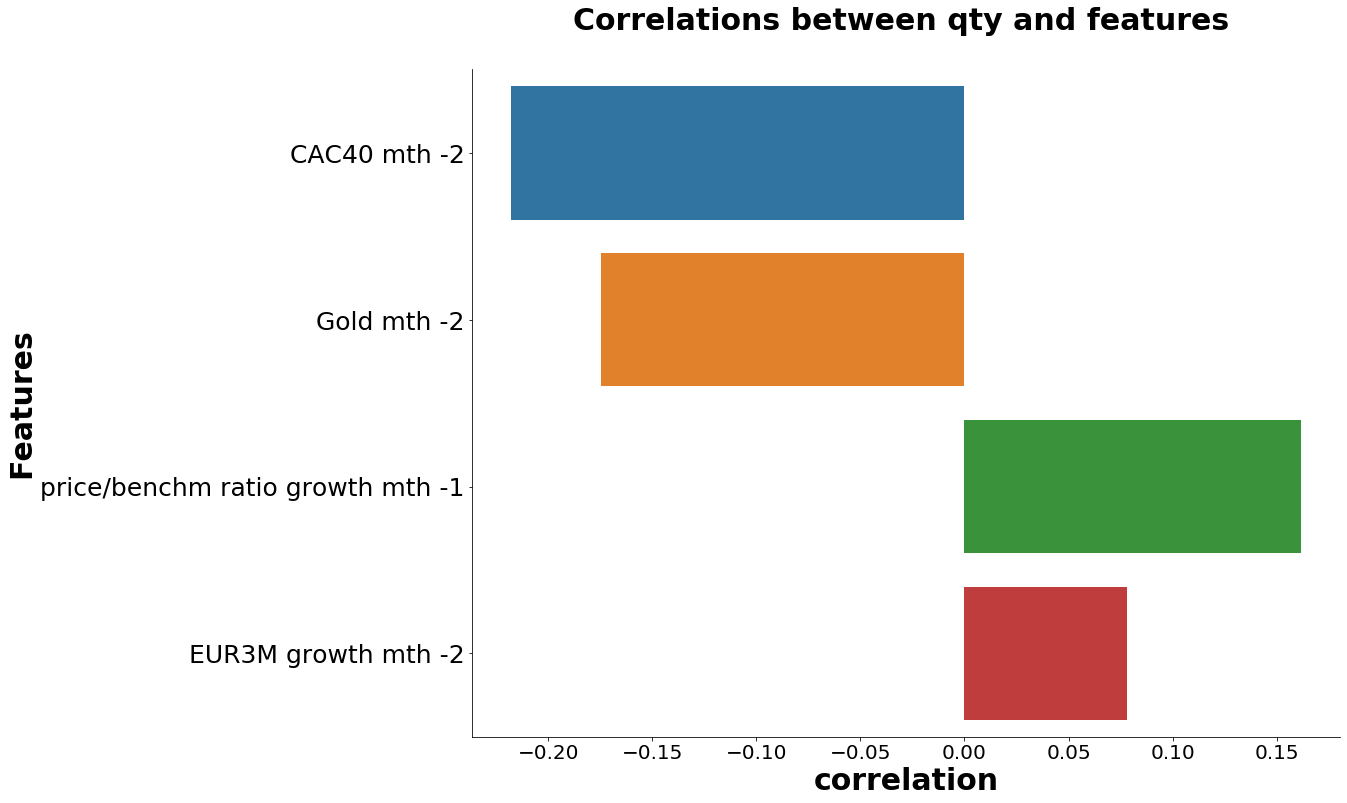

In [175]:
# Graphe pour le feature ranking
sns.catplot(x=[value for value in corr['qty'].values], y=['CAC40 mth -2', 'Gold mth -2', 'price/benchm ratio growth mth -1', 'EUR3M growth mth -2'], data=corr, kind="bar", legend=False, height=10, aspect=1.5)
plt.xlabel('correlation', fontsize=30, fontweight= 'bold')
plt.ylabel('Features', fontsize=30, fontweight= 'bold')
plt.yticks(fontsize=25)
plt.xticks(fontsize=20)
plt.title('Correlations between qty and features \n', fontsize=30, fontweight= 'bold')
plt.show();

In [34]:
#Définition des variables explicatives et cibles:
X_13 = df_13.loc[:,['qty -1','CAC40 -2', 'Gold -2', 'ratio growth -1', 'EUR3M growth -2']]
y_13 = df_13.loc[:,['qty']]
X_13.head()

,qty -1,CAC40 -2,Gold -2,ratio growth -1,EUR3M growth -2
0,384462.94100,3697.415479,1098.900012,-0.000050,-0.026471
1,266257.42770,3912.442584,1114.204346,0.006167,-0.025680
2,309213.06483,3985.003479,1150.528576,-0.001245,0.000000
3,255936.88579,3574.881917,1204.255011,-0.002540,0.065116
4,114275.98706,3561.960471,1233.522733,0.002274,0.059680


In [35]:
# Making predictions from January 2017 until May 2020. Model is trained iteratively on available history on ith month

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
for i in range(df_13[df_13['date']=='2017-01-01'].index[0], len(df_13)):
    X_train = X_13.iloc[:i,:]
    y_train = y_13.iloc[:i,:]
    X_test = X_13.iloc[i,:]
    y_test = y_13.iloc[i,:]
    X_test = pd.DataFrame(data=np.array(X_test).reshape(1, -1),index={len(X_train)},columns=X_train.columns)
    X_train = pd.DataFrame(sc_x.fit_transform(X_train), columns = X_train.columns, index= X_train.index)
    X_test = pd.DataFrame(sc_x.transform(X_test), columns = X_test.columns, index=X_test.index)
    regressor.fit(X_train, y_train)
    df_13.loc[i,'pred'] = regressor.predict(X_test)[0][0]

In [45]:
df13_2017=df_13[df_13['date'] >= '2017-01-01'].reset_index(drop=True)
df13_2017.head()

,date,price,benchmprice,qty,CAC40,ratio,price -1,benchm -1,qty -1,ratio -1,...,Gold growth -1,Gold growth -2,EUR3M,EUR3M -1,EUR3M -2,EUR3M -3,EUR3M growth,EUR3M growth -1,EUR3M growth -2,pred
0,2017-01-01,1752.710000,169.722905,427815.80159,4868.038641,10.326891,1751.775714,169.894914,404058.60690,10.310937,...,-0.069762,-0.023103,-0.326,-0.316,-0.313,-0.309,0.031646,0.009585,0.012945,368057.696618
1,2017-02-01,1754.786500,169.616745,533666.22824,4850.731494,10.345597,1752.710000,169.722905,427815.80159,10.326891,...,0.033395,-0.069762,-0.329,-0.326,-0.316,-0.313,0.009202,0.031646,0.009585,405341.287265
2,2017-03-01,1755.212609,169.503039,393403.47342,4996.883874,10.355051,1754.786500,169.616745,533666.22824,10.345597,...,0.034644,0.033395,-0.329,-0.329,-0.326,-0.316,0.000000,0.009202,0.031646,529854.636220
3,2017-04-01,1756.560556,169.544750,253764.66408,5132.827230,10.360454,1755.212609,169.503039,393403.47342,10.355051,...,-0.001179,0.034644,-0.330,-0.329,-0.329,-0.326,0.003040,0.000000,0.009202,380378.529645
4,2017-05-01,1756.204000,169.585135,184162.12741,5349.059570,10.355884,1756.560556,169.544750,253764.66408,10.360454,...,0.030463,-0.001179,-0.329,-0.330,-0.329,-0.329,-0.003030,0.003040,0.000000,250395.017958


In [43]:
# Calcul du R2 score sur la prédiode janvier 2017 - mai 2020:

Moyenne = df13_2017['qty'].mean()
num = 0
denum = 0
for i in range(len(df13_2017)):
    num += (df13_2017.loc[i,'qty'] - df13_2017.loc[i,'pred'])**2
    denum += (df13_2017.loc[i,'qty'] - Moyenne)**2
R2 = 1 - (num/denum)
print(f"R2 score: {round(R2,2)}")

R2 score: 0.64


In [39]:
df_13.loc[:,['date','qty -1','CAC40 -2', 'Gold -2', 'ratio growth -1', 'EUR3M growth -2','qty']].head()

,date,qty -1,CAC40 -2,Gold -2,ratio growth -1,EUR3M growth -2,qty
0,2010-04-01,384462.94100,3697.415479,1098.900012,-0.000050,-0.026471,266257.42770
1,2010-05-01,266257.42770,3912.442584,1114.204346,0.006167,-0.025680,309213.06483
2,2010-06-01,309213.06483,3985.003479,1150.528576,-0.001245,0.000000,255936.88579
3,2010-07-01,255936.88579,3574.881917,1204.255011,-0.002540,0.065116,114275.98706
4,2010-08-01,114275.98706,3561.960471,1233.522733,0.002274,0.059680,93908.16473


In [41]:
df13_2017.loc[:,['date','qty','pred']].head(20)

,date,qty,pred
0,2017-01-01,427815.80159,368057.696618
1,2017-02-01,533666.22824,405341.287265
2,2017-03-01,393403.47342,529854.636220
3,2017-04-01,253764.66408,380378.529645
4,2017-05-01,184162.12741,250395.017958
5,2017-06-01,46433.67468,189504.750602
6,2017-07-01,99734.71815,62318.532658
7,2017-08-01,4124.76489,116290.929057
8,2017-09-01,-237083.43124,16625.704387
9,2017-10-01,-436486.12427,-206276.633280


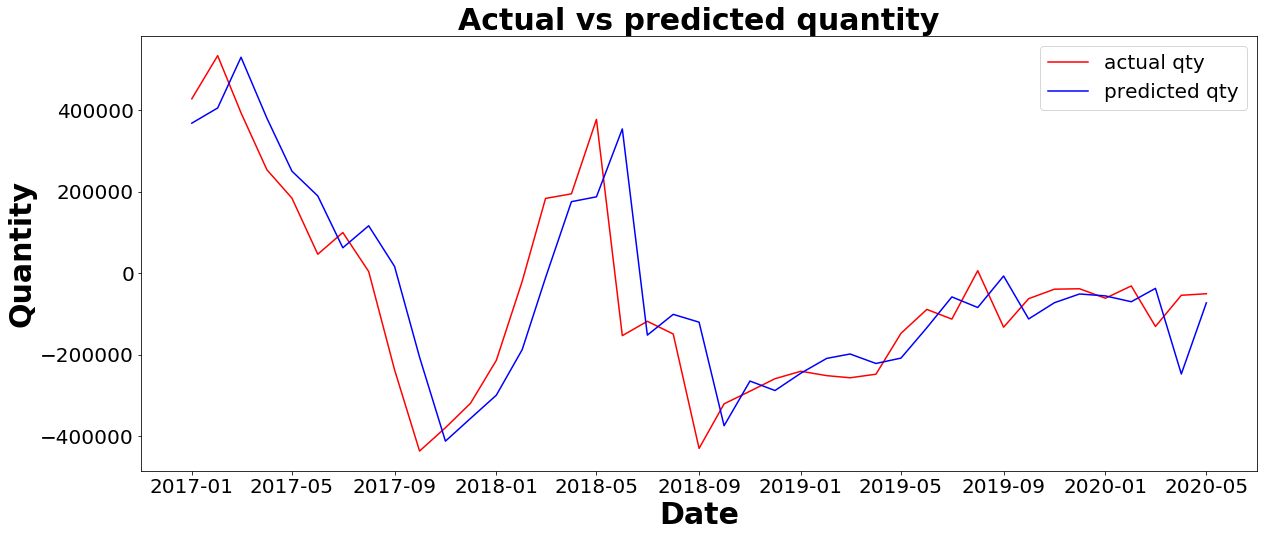

In [48]:
# Graphe montrant la comparaison entre la quantité réelle et la quantité prédite:
fig, ax1 = plt.subplots(figsize=(20,8))

color1 = 'red'
color2 = 'blue'
ax1.set_xlabel('Date', fontsize = 30, fontweight = 'bold')
ax1.set_ylabel('Quantity', color='black', fontsize = 30, fontweight = 'bold')
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)
ax1.plot(df13_2017['date'], df13_2017['qty'], color=color1, label='actual qty')
ax1.plot(df13_2017['date'], df13_2017['pred'], color=color2, label ='predicted qty')

plt.title('Actual vs predicted quantity', fontsize=30, fontweight = 'bold')
ax1.legend(fontsize=20)
#plt.xticks(['2017','2017-07-01', '2018-01-01', '2018-07-01', '2019-01-01', '2019-07-01', '2020-01-01'])

plt.show()

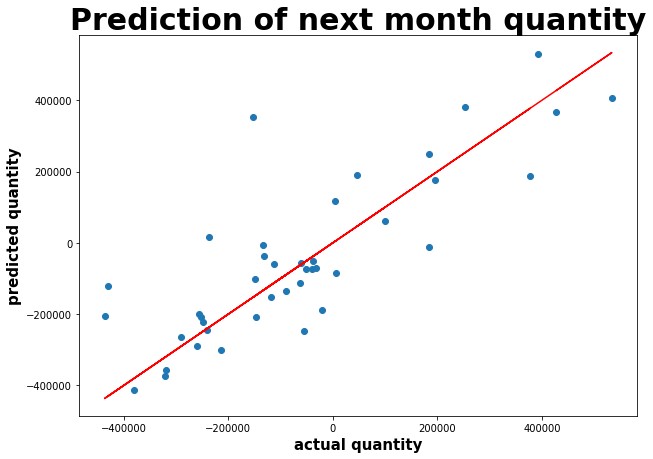

In [49]:
# Visualisation de l'erreur sur une prédiction au mois suivant:
plt.subplots(figsize=(10,7))
plt.scatter(x = 'qty', y= 'pred', data=df13_2017);
plt.plot(df13_2017['qty'], df13_2017['qty'],color='red');
plt.xlabel('actual quantity', fontsize = 15, fontweight = 'bold')
plt.ylabel('predicted quantity', color='black', fontsize = 15, fontweight = 'bold')
plt.title('Prediction of next month quantity', color='black', fontsize = 30, fontweight = 'bold');